In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Final_Project_1mg_medicines.csv to Final_Project_1mg_medicines.csv


In [5]:
medicines = pd.read_csv('Final_Project_1mg_medicines.csv')
medicines_copy = medicines

# Data Cleaning

There are 12,936 medicines in the dataset with 9 descriptors.
According to the FDA, most medicines available can be classified into 40 categories.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving DrugCategories.csv to DrugCategories.csv


In [8]:
drug_categories = pd.read_csv('DrugCategories.csv',header=None)
drug_categories = drug_categories.drop([2],axis=1)
drug_categories.columns =['Drug', 'Description']

In [9]:
drug_categories.dtypes

Drug           object
Description    object
dtype: object

In [10]:
drug_categories

Drug  \
0                         Analgesics   
1                           Antacids   
2                  Antianxiety Drugs   
3                    Antiarrhythmics   
4                     Antibacterials   
5                        Antibiotics   
6   Anticoagulants and Thrombolytics   
7                    Anticonvulsants   
8                    Antidepressants   
9                     Antidiarrheals   
10                       Antiemetics   
11                       Antifungals   
12                    Antihistamines   
13                 Antihypertensives   
14               Anti-Inflammatories   
15                   Antineoplastics   
16                    Antipsychotics   
17                      Antipyretics   
18                        Antivirals   
19                      Barbiturates   
20                     Beta-Blockers   
21                   Bronchodilators   
22                        Cold Cures   
23                   Corticosteroids   
24                Cough Suppressants   
25                        Cytotoxics   
26                     Decongestants   
27                         Diuretics   
28                       Expectorant   
29                          Hormones   
30              Hypoglycemics (Oral)   
31                Immunosuppressives   
32                         Laxatives   
33                  Muscle Relaxants   
34                         Sedatives   
35             Sex Hormones (Female)   
36               Sex Hormones (Male)   
37                    Sleeping Drugs   
38                      Tranquilizer   
39                          Vitamins   

                                          Description  
0   Drugs that relieve pain. There are two main ty...  
1   Drugs that relieve indigestion and heartburn b...  
2   Drugs that suppress anxiety and relax muscles ...  
3   Drugs used to control irregularities of heartb...  
4                     Drugs used to treat infections.  
5   Drugs made from naturally occurring and synthe...  
6   Anticoagulants prevent blood from clotting. Th...  
7              Drugs that prevent epileptic seizures.  
8   There are three main groups of mood-lifting an...  
9   Drugs used for the relief of diarrhea. Two mai...  
10           Drugs used to treat nausea and vomiting.  
11  Drugs used to treat fungal infections, the mos...  
12  Drugs used primarily to counteract the effects...  
13  Drugs that lower blood pressure. The types of ...  
14  Drugs used to reduce inflammation - the rednes...  
15                        Drugs used to treat cancer.  
16  Drugs used to treat symptoms of severe psychia...  
17                           Drugs that reduce fever.  
18  Drugs used to treat viral infections or to pro...  
19                              See "sleeping drugs."  
20  Beta-adrenergic blocking agents, or beta-block...  
21  Drugs that open up the bronchial tubes within ...  
22  Although there is no drug that can cure a cold...  
23  These hormonal preparations are used primarily...  
24  Simple cough medicines, which contain substanc...  
25  Drugs that kill or damage cells. Cytotoxics ar...  
26  Drugs that reduce swelling of the mucous membr...  
27  Drugs that increase the quantity of urine prod...  
28  A drug that stimulates the flow of saliva and ...  
29  Chemicals produced naturally by the endocrine ...  
30  Drugs that lower the level of glucose in the b...  
31  Drugs that prevent or reduce the body's normal...  
32  Drugs that increase the frequency and ease of ...  
33  Drugs that relieve muscle spasm in disorders s...  
34                         Same as Antianxiety drugs.  
35  There are two groups of these hormones (estrog...  
36  Androgenic hormones, of which the most powerfu...  
37  The two main groups of drugs that are used to ...  
38  This is a term commonly used to describe any d...  
39  Chemicals essential in small quantities for go...

In [11]:
medicines.shape

(12936, 16)

In [12]:
medicines.dtypes

manufacturer          object
nonProprietaryName    object
dosageForm            object
activeIngredient      object
mechanismOfAction     object
interactingDrug       object
Name                  object
Price                 object
Description           object
Product Info          object
Uses                  object
Benefits              object
Side Effects          object
Workings              object
Factbox               object
Substitute            object
dtype: object

In [13]:
medicines.isna().sum()

manufacturer             0
nonProprietaryName       0
dosageForm               0
activeIngredient         0
mechanismOfAction        0
interactingDrug       7985
Name                     0
Price                    0
Description             18
Product Info           791
Uses                  1660
Benefits                10
Side Effects             0
Workings              2996
Factbox                  0
Substitute             925
dtype: int64

In [14]:
medicines = medicines.drop_duplicates('Name', keep='last')

In [15]:
medicines.shape

(12605, 16)

In [16]:
medicines['Price'].value_counts()

 Not found     463
110             79
90              78
75              69
65              67
              ... 
3790             1
98.49            1
240.35           1
70.4             1
21.23            1
Name: Price, Length: 4987, dtype: int64

In [17]:
medicines['Price'] = medicines['Price'].replace({' Not found ': np.nan})
medicines['Price'] = medicines['Price'].astype('float')
medicines['Price'].value_counts()

<ipython-input-17-7ebd0f61244e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicines['Price'] = medicines['Price'].replace({' Not found ': np.nan})
<ipython-input-17-7ebd0f61244e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicines['Price'] = medicines['Price'].astype('float')


110.00      79
90.00       78
75.00       69
65.00       67
120.00      67
            ..
59.38        1
99.80        1
17985.90     1
268.23       1
21.23        1
Name: Price, Length: 4986, dtype: int64

In [18]:
medicines2 = medicines.drop(['interactingDrug','Side Effects'], axis=1)

In [19]:
medicines2.dtypes

manufacturer           object
nonProprietaryName     object
dosageForm             object
activeIngredient       object
mechanismOfAction      object
Name                   object
Price                 float64
Description            object
Product Info           object
Uses                   object
Benefits               object
Workings               object
Factbox                object
Substitute             object
dtype: object

In [20]:
medicines2

manufacturer  \
0       'Glaxo SmithKline Pharmaceuticals Ltd'}   
1               'Glenmark Pharmaceuticals Ltd'}   
2                'Alembic Pharmaceuticals Ltd'}   
3                           'Sanofi India Ltd'}   
4                                     'Abbott'}   
...                                         ...   
12931                  'Ipca Laboratories Ltd'}   
12932                 'Alkem Laboratories Ltd'}   
12933                         'Micro Labs Ltd'}   
12934                              'Cipla Ltd'}   
12935                                 'Abbott'}   

                                      nonProprietaryName  dosageForm  \
0       Amoxycillin + Clavulanic Acid 500mg+125mg Tablet      Tablet   
1      Ambroxol+Levosalbutamol+Guaifenesin 30mg/5ml+1...       Syrup   
2                              Azithromycin 500mg Tablet      Tablet   
3                              Fexofenadine 120mg Tablet      Tablet   
4       Amoxycillin + Clavulanic Acid 500mg+125mg Tablet      Tablet   
...                                                  ...         ...   
12931  Aceclofenac+Thiocolchicoside 200mg+8mg Capsule SR  Capsule SR   
12932                            Sildenafil 100mg Tablet      Tablet   
12933      Dapagliflozin+Metformin 10mg+1000mg Tablet ER   Tablet ER   
12934                        Clarithromycin 250mg Tablet      Tablet   
12935                          Diclofenac 50mg Tablet DT   Tablet DT   

                          activeIngredient  \
0            Amoxycillin + Clavulanic Acid   
1      Ambroxol+Levosalbutamol+Guaifenesin   
2                             Azithromycin   
3                             Fexofenadine   
4            Amoxycillin + Clavulanic Acid   
...                                    ...   
12931         Aceclofenac+Thiocolchicoside   
12932                           Sildenafil   
12933              Dapagliflozin+Metformin   
12934                       Clarithromycin   
12935                           Diclofenac   

                                       mechanismOfAction  \
0      ['Augmentin 625 Duo Tablet is a combination of...   
1      ['Ascoril LS Syrup is a combination of three m...   
2      ['Azithral 500 Tablet is an antibiotic.  It wo...   
3      ['Allegra 120mg Tablet belongs to a class of m...   
4      ['Amoxyclav 625 Tablet is a combination of two...   
...                                                  ...   
12931  ['Zerodol TH OD 200 mg/8 mg Capsule SR is a co...   
12932  ['Zenegra Red 100mg Tablet is a phosphodiester...   
12933  ["Zucapride-M 1000 Tablet ER is a combination ...   
12934  ['Zoclar 250 Tablet is an antibiotic.  It work...   
12935  ['Zobid D 50 Tablet DT is a non-steroidal anti...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                             Description  \
0      Augmentin 625 Duo Tablet is a penicillin-type ...   
1      Ascoril LS Syrup is a combination medicine use...   
2      Azithral 500 Tablet is an antibiotic used to t...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is a penicillin-type of a...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR is a comb...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Zucapride-M 1000 Tablet ER is a combination of...   
12934  Zoclar 250 Tabl

In [21]:
medicines2['manufacturer'] = medicines2['manufacturer'].apply(lambda x: x.replace('}', ''))
medicines2['nonProprietaryName'] = medicines2['nonProprietaryName'].apply(lambda x: x.replace('+', ','))
medicines2['activeIngredient'] = medicines2['activeIngredient'].apply(lambda x: x.replace('+', ','))
medicines2['mechanismOfAction'] = medicines2['mechanismOfAction'].str.replace('[', '').str.replace(']', '')

<ipython-input-21-502a624324dc>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  medicines2['mechanismOfAction'] = medicines2['mechanismOfAction'].str.replace('[', '').str.replace(']', '')


In [22]:
medicines2 = medicines2.drop(['Substitute'], axis=1)

In [23]:
import re
therapeutic_class = []

for entry in medicines2['Factbox']:
    match = re.search(r"'Therapeutic Class': '(.+?)'", entry)
    if match:
        therapeutic_class.append(match.group(1))
    else:
        therapeutic_class.append(None)

In [24]:
therapeutic_class

['ANTI INFECTIVES',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'RESPIRATORY',
 'RESPIRATORY',
 'GASTRO INTESTINAL',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'DERMA',
 'CARDIAC',
 'GASTRO INTESTINAL',
 'RESPIRATORY',
 'NEURO CNS',
 'RESPIRATORY',
 'RESPIRATORY',
 'RESPIRATORY',
 'PAIN ANALGESICS',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'RESPIRATORY',
 'CARDIAC',
 'RESPIRATORY',
 'CARDIAC',
 'ANTI INFECTIVES',
 'GASTRO INTESTINAL',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'PAIN ANALGESICS',
 'NEURO CNS',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'RESPIRATORY',
 'RESPIRATORY',
 'PAIN ANALGESICS',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'VITAMINS MINERALS NUTRIENTS',
 'UROLOGY',
 'PAIN ANALGESICS',
 'GASTRO INTESTINAL',
 'RESPIRATORY',
 'ANTI INFECTIVES',
 'UROLOGY',
 'PAIN ANALGESICS',
 'ANTI INFECTIVES',
 'RESPIRATORY',
 'RESPIRATORY',
 'RESPIRATORY',
 '

In [25]:
medicines2['therapeutic_class'] = therapeutic_class
medicines2['therapeutic_class'] = medicines2['therapeutic_class'].replace({'\'': ''}, regex=True)

In [26]:
medicines2 = medicines2.drop(['Factbox'],axis=1)
medicines2

manufacturer  \
0       'Glaxo SmithKline Pharmaceuticals Ltd'   
1               'Glenmark Pharmaceuticals Ltd'   
2                'Alembic Pharmaceuticals Ltd'   
3                           'Sanofi India Ltd'   
4                                     'Abbott'   
...                                        ...   
12931                  'Ipca Laboratories Ltd'   
12932                 'Alkem Laboratories Ltd'   
12933                         'Micro Labs Ltd'   
12934                              'Cipla Ltd'   
12935                                 'Abbott'   

                                      nonProprietaryName  dosageForm  \
0       Amoxycillin , Clavulanic Acid 500mg,125mg Tablet      Tablet   
1      Ambroxol,Levosalbutamol,Guaifenesin 30mg/5ml,1...       Syrup   
2                              Azithromycin 500mg Tablet      Tablet   
3                              Fexofenadine 120mg Tablet      Tablet   
4       Amoxycillin , Clavulanic Acid 500mg,125mg Tablet      Tablet   
...                                                  ...         ...   
12931  Aceclofenac,Thiocolchicoside 200mg,8mg Capsule SR  Capsule SR   
12932                            Sildenafil 100mg Tablet      Tablet   
12933      Dapagliflozin,Metformin 10mg,1000mg Tablet ER   Tablet ER   
12934                        Clarithromycin 250mg Tablet      Tablet   
12935                          Diclofenac 50mg Tablet DT   Tablet DT   

                          activeIngredient  \
0            Amoxycillin , Clavulanic Acid   
1      Ambroxol,Levosalbutamol,Guaifenesin   
2                             Azithromycin   
3                             Fexofenadine   
4            Amoxycillin , Clavulanic Acid   
...                                    ...   
12931         Aceclofenac,Thiocolchicoside   
12932                           Sildenafil   
12933              Dapagliflozin,Metformin   
12934                       Clarithromycin   
12935                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                             Description  \
0      Augmentin 625 Duo Tablet is a penicillin-type ...   
1      Ascoril LS Syrup is a combination medicine use...   
2      Azithral 500 Tablet is an antibiotic used to t...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is a penicillin-type of a...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR is a comb...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Zucapride-M 1000 Tablet ER is a combination of...   
12934  Zoclar 250 Tablet is an an

Exploring different uses/categories of medicines

In [27]:
len(medicines2['Uses'].value_counts())

361

In [28]:
medicines2['Uses'].value_counts()

Treatment of Bacterial infections                             985
Treatment of Type 2 diabetes mellitus                         816
Pain relief                                                   812
Treatment of Hypertension (high blood pressure)               438
Treatment of Gastroesophageal reflux disease (Acid reflux)    311
                                                             ... 
Symptomatic Pain relief                                         1
Prevention of Asthma                                            1
Urinary tract infections (UTIs)                                 1
Treatment of Hyperparathyroidism                                1
Fungal infections of eye                                        1
Name: Uses, Length: 361, dtype: int64

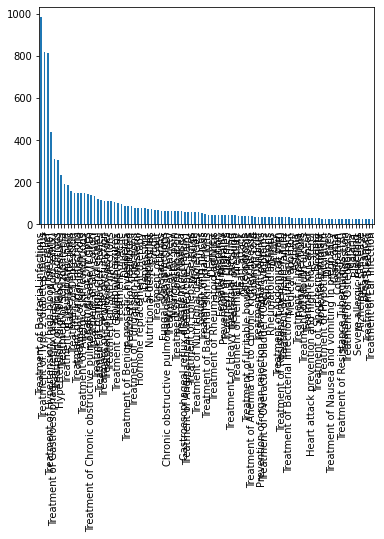

In [29]:
medicines2['Uses'].value_counts().head(100).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (60,30)

In [30]:
medicines2['Uses'].value_counts().head(10).sum()/medicines2['Uses'].value_counts().sum()

0.40411582589692224

Checking average price of medicine by usage


In [31]:
result = medicines2.groupby('Uses')['Price'].mean()
result.dropna().sort_values(ascending = False)

Uses
Melanoma                                                                      236500.000000
Soft tissue sarcoma                                                           133300.000000
Diabetic macular edema (accumulation of fluid in eye of diabetic patients)     56693.000000
Hodgkin’s disease                                                              49400.000000
Prostate cancer                                                                37353.916667
                                                                                  ...      
Treatment of Severe allergic reactions                                            34.049474
Short term anxiety                                                                29.282000
Common cold symptoms with fever                                                   28.000000
Decreased magnesium levels in blood                                               11.450000
Treatment of Bloating                                                      

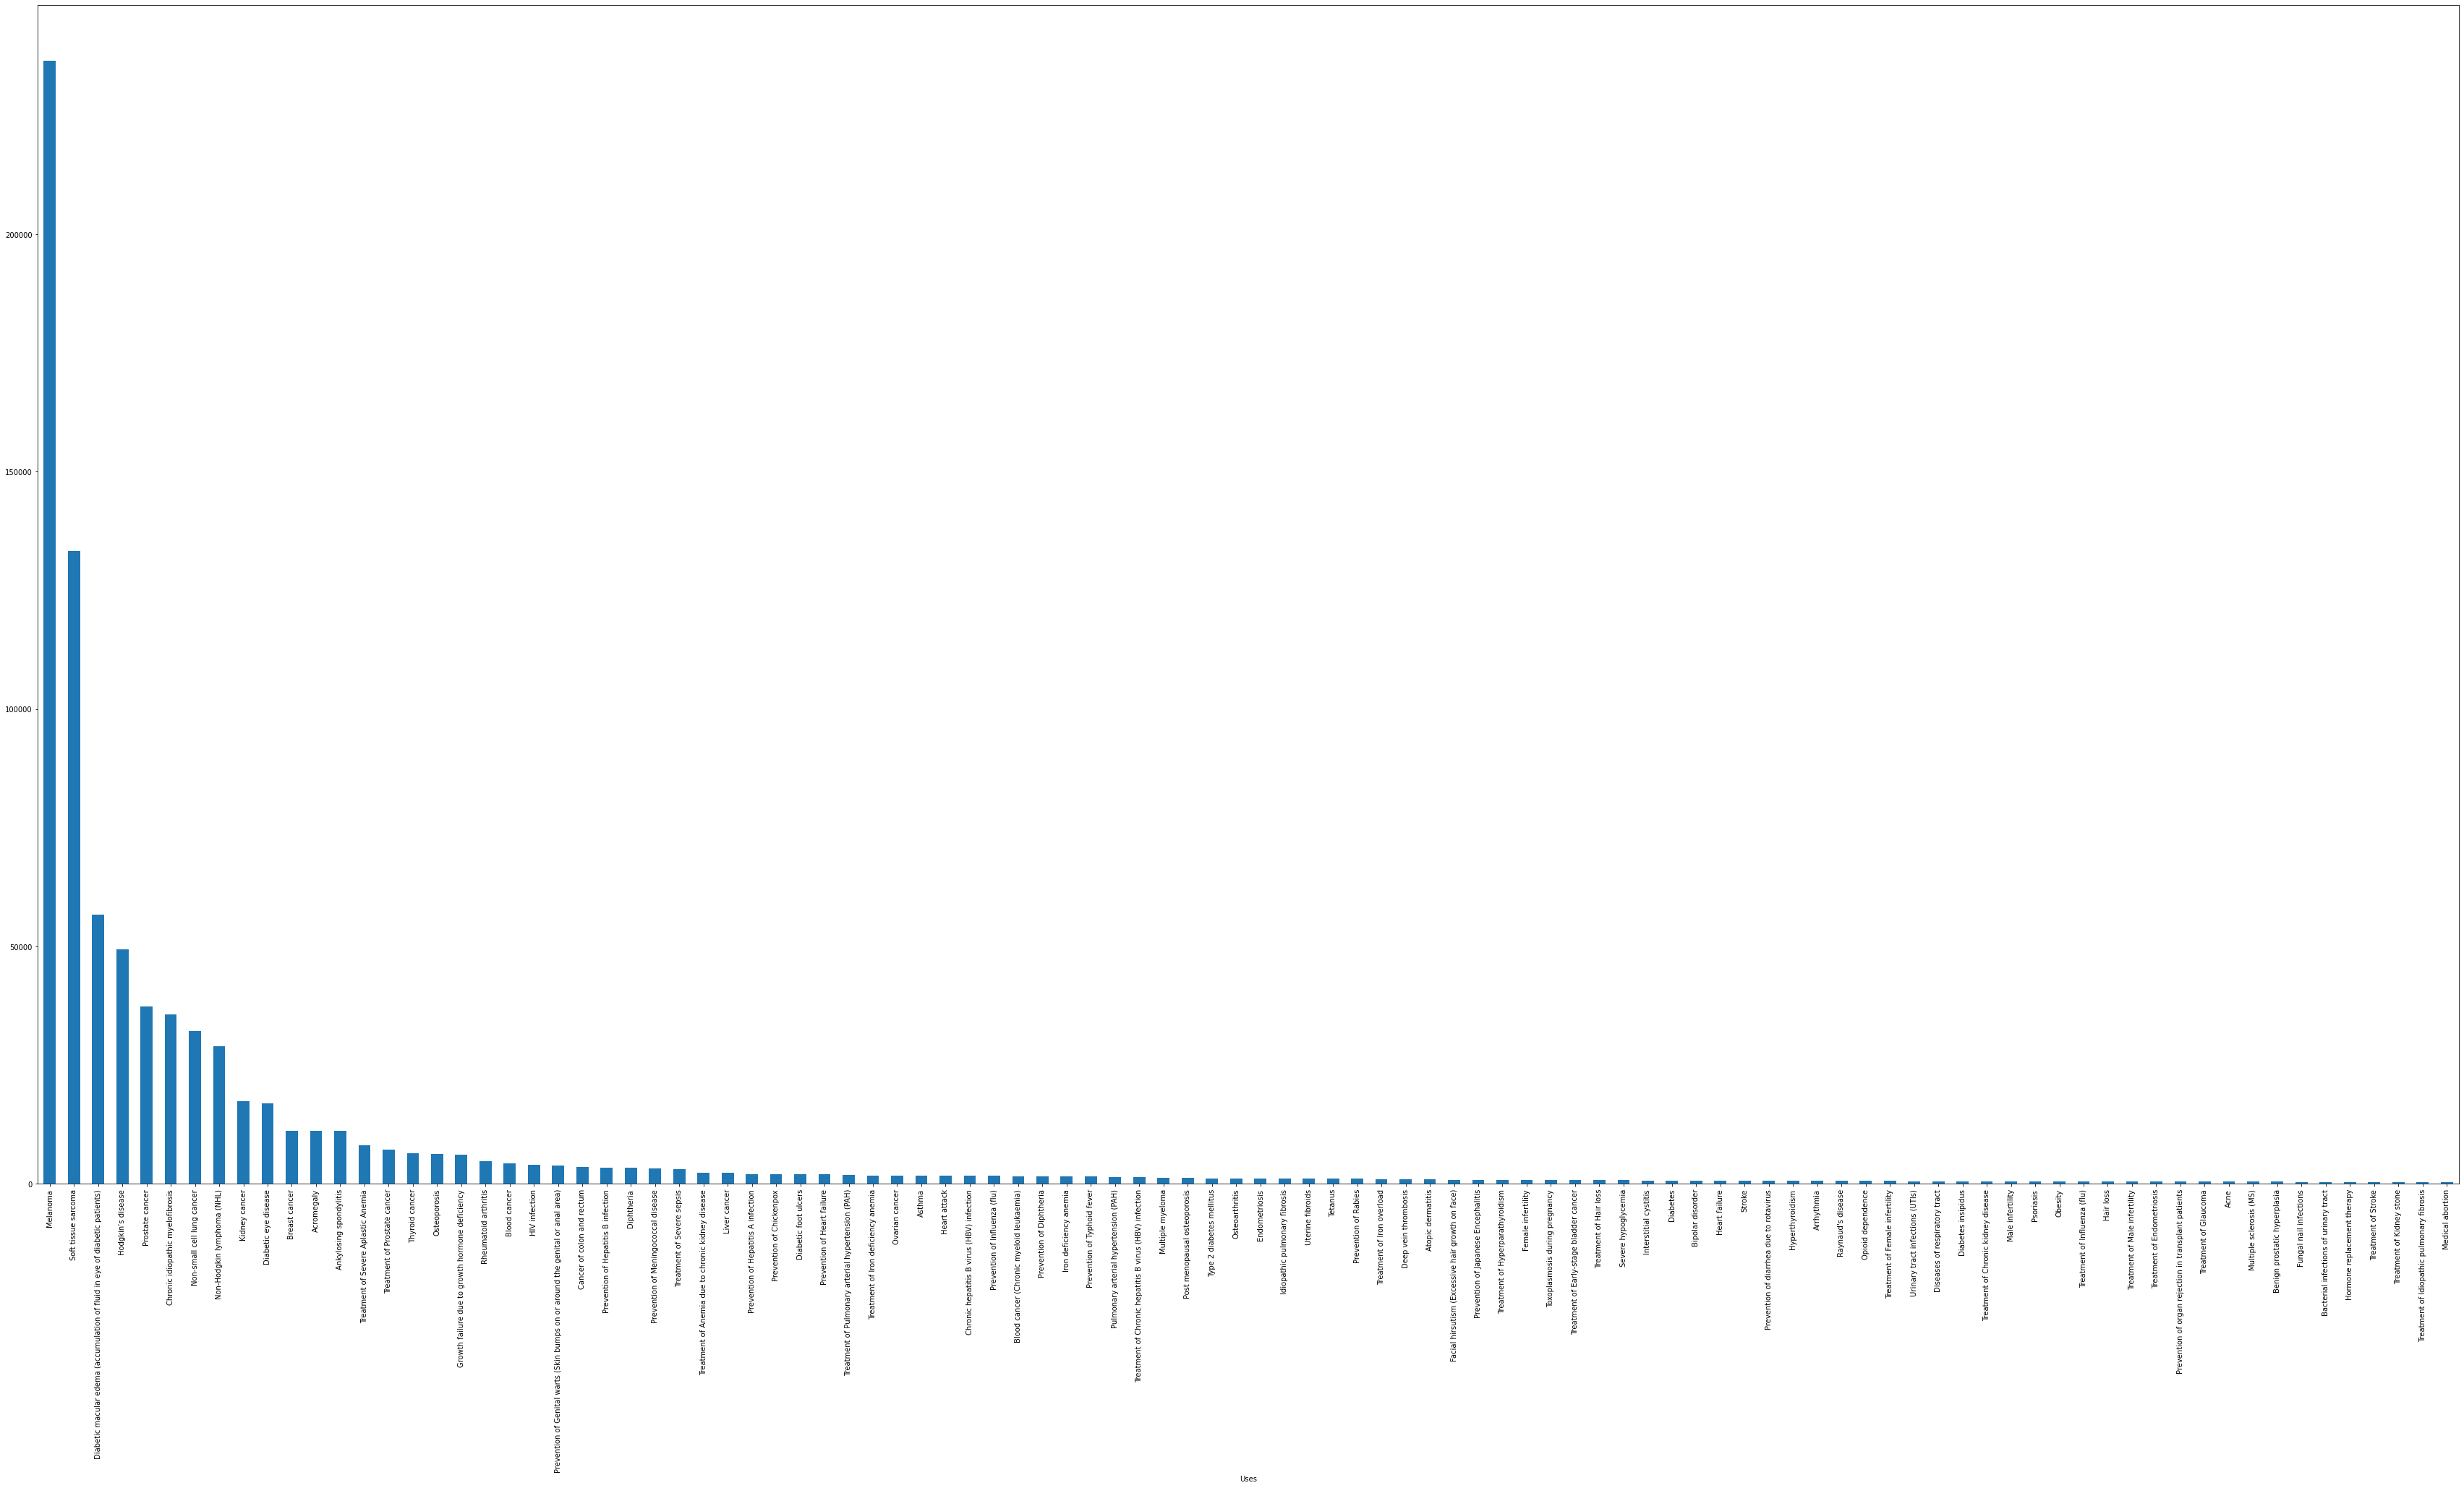

In [32]:
result.dropna().sort_values(ascending = False).head(100).plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (50,20)

In [33]:
len(medicines2['therapeutic_class'].value_counts())

22

In [34]:
medicines2['therapeutic_class'].value_counts()

ANTI INFECTIVES                1532
RESPIRATORY                    1514
NEURO CNS                      1345
PAIN ANALGESICS                1321
GASTRO INTESTINAL              1296
CARDIAC                        1270
ANTI DIABETIC                   947
DERMA                           838
OPHTHAL                         544
GYNAECOLOGICAL                  383
VITAMINS MINERALS NUTRIENTS     289
UROLOGY                         282
BLOOD RELATED                   215
ANTI NEOPLASTICS                151
HORMONES                        149
SEX STIMULANTS REJUVENATORS     138
OPHTHAL OTOLOGICALS             133
VACCINES                         85
OTOLOGICALS                      67
OTHERS                           36
STOMATOLOGICALS                  32
ANTI MALARIALS                   31
Name: therapeutic_class, dtype: int64

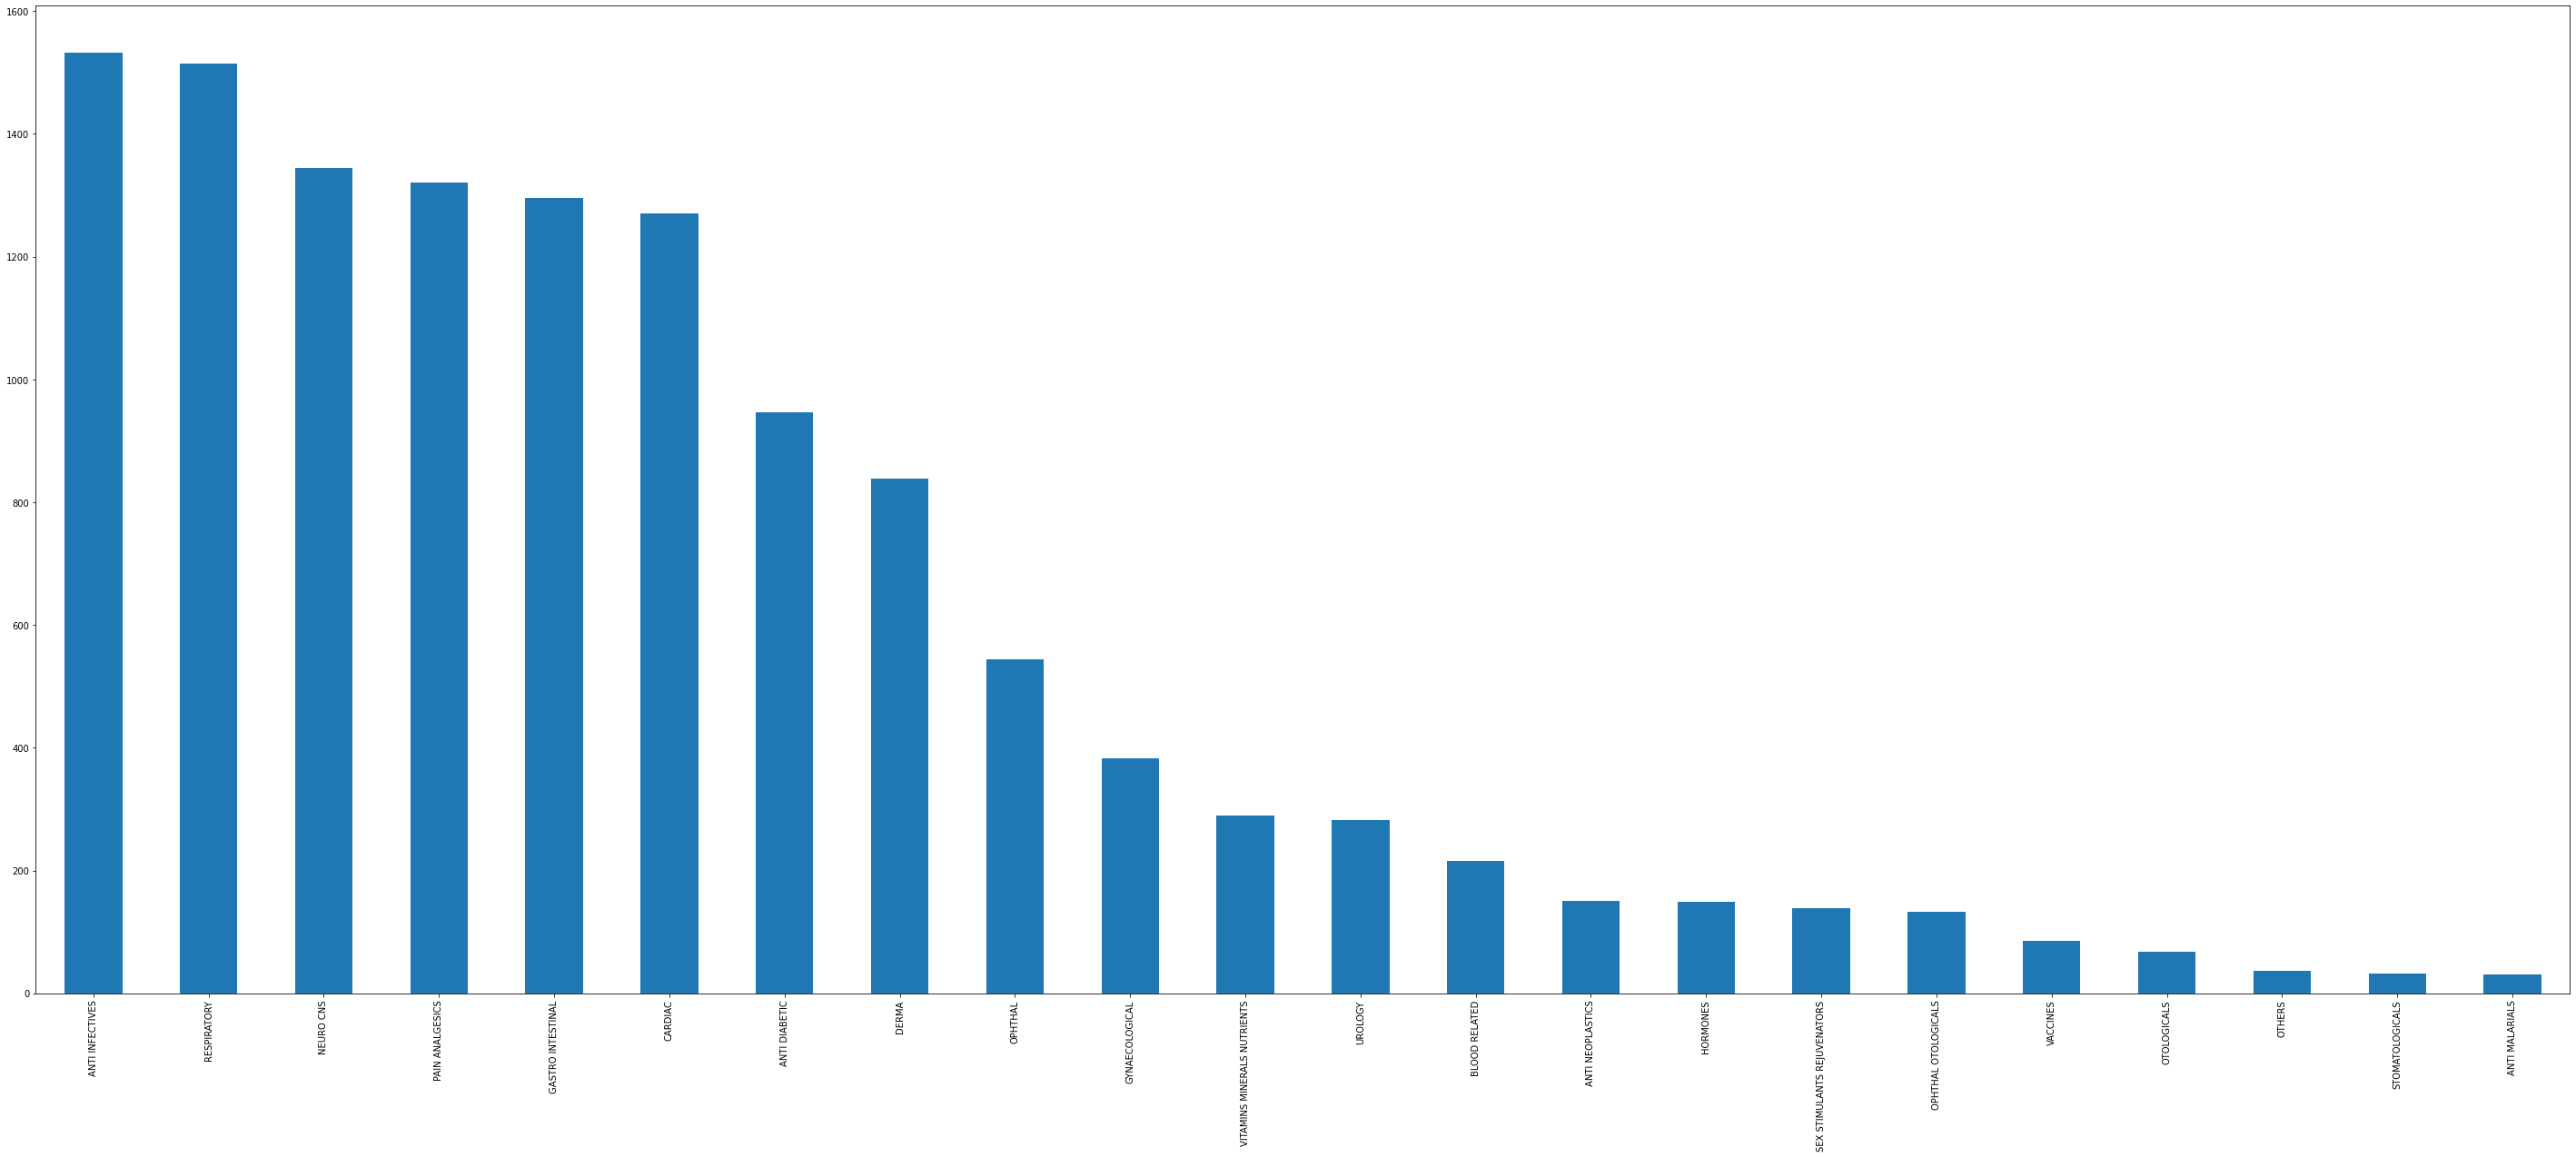

In [35]:
medicines2['therapeutic_class'].value_counts().plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)

In [36]:
medicines2

manufacturer  \
0       'Glaxo SmithKline Pharmaceuticals Ltd'   
1               'Glenmark Pharmaceuticals Ltd'   
2                'Alembic Pharmaceuticals Ltd'   
3                           'Sanofi India Ltd'   
4                                     'Abbott'   
...                                        ...   
12931                  'Ipca Laboratories Ltd'   
12932                 'Alkem Laboratories Ltd'   
12933                         'Micro Labs Ltd'   
12934                              'Cipla Ltd'   
12935                                 'Abbott'   

                                      nonProprietaryName  dosageForm  \
0       Amoxycillin , Clavulanic Acid 500mg,125mg Tablet      Tablet   
1      Ambroxol,Levosalbutamol,Guaifenesin 30mg/5ml,1...       Syrup   
2                              Azithromycin 500mg Tablet      Tablet   
3                              Fexofenadine 120mg Tablet      Tablet   
4       Amoxycillin , Clavulanic Acid 500mg,125mg Tablet      Tablet   
...                                                  ...         ...   
12931  Aceclofenac,Thiocolchicoside 200mg,8mg Capsule SR  Capsule SR   
12932                            Sildenafil 100mg Tablet      Tablet   
12933      Dapagliflozin,Metformin 10mg,1000mg Tablet ER   Tablet ER   
12934                        Clarithromycin 250mg Tablet      Tablet   
12935                          Diclofenac 50mg Tablet DT   Tablet DT   

                          activeIngredient  \
0            Amoxycillin , Clavulanic Acid   
1      Ambroxol,Levosalbutamol,Guaifenesin   
2                             Azithromycin   
3                             Fexofenadine   
4            Amoxycillin , Clavulanic Acid   
...                                    ...   
12931         Aceclofenac,Thiocolchicoside   
12932                           Sildenafil   
12933              Dapagliflozin,Metformin   
12934                       Clarithromycin   
12935                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                             Description  \
0      Augmentin 625 Duo Tablet is a penicillin-type ...   
1      Ascoril LS Syrup is a combination medicine use...   
2      Azithral 500 Tablet is an antibiotic used to t...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is a penicillin-type of a...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR is a comb...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Zucapride-M 1000 Tablet ER is a combination of...   
12934  Zoclar 250 Tablet is an an

Aim 1: To cluster/label medicines according to the 40 categories listed by the FDA.

Aim 2: To build model which predicts price of medicines based on its details.

Features to be used: activeIngredient, Name, Price, Dosage Form, therapeutic_class, Mechanism of Action, Uses, benefits, description, product info. Columns Description, Product Info, and Benefits to be concatenated.

In [37]:
medicines_final = medicines2.drop(['manufacturer','nonProprietaryName','Workings'],axis=1)
# Workings column is mostly a duplicate of the Mechanism of Action column
medicines_final

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                             Description  \
0      Augmentin 625 Duo Tablet is a penicillin-type ...   
1      Ascoril LS Syrup is a combination medicine use...   
2      Azithral 500 Tablet is an antibiotic used to t...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is a penicillin-type of a...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR is a comb...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Zucapride-M 1000 Tablet ER is a combination of...   
12934  Zoclar 250 Tablet is an antibiotic used to tre...   
12935  Zobid D 50 Tablet DT is a pain-relieving medic...   

                                            Product Info  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3                                                    NaN   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932                                                NaN   
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

                                        Uses  \
0          Treatment of Bacterial infections   
1              Treatment of Cough with mucus   
2          Treatment of Bacterial infections   
3           Treatment of Allergic conditions   
4          Treatment of Bacterial infections   
...                                      ...   
12931                                    NaN   
12932      Treatment of Erectile dysfunction   
12933  Treatment of Type 2 diabetes mellitus   
12934 

In [38]:
medicines_final['Product Info'].fillna('', inplace=True)
medicines_final['Combined_desc'] = medicines_final['Product Info'] + medicines_final['Description'] + medicines_final['Benefits']
medicines_final

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                             Description  \
0      Augmentin 625 Duo Tablet is a penicillin-type ...   
1      Ascoril LS Syrup is a combination medicine use...   
2      Azithral 500 Tablet is an antibiotic used to t...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is a penicillin-type of a...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR is a comb...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Zucapride-M 1000 Tablet ER is a combination of...   
12934  Zoclar 250 Tablet is an antibiotic used to tre...   
12935  Zobid D 50 Tablet DT is a pain-relieving medic...   

                                            Product Info  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3                                                          
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932                                                      
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

                                        Uses  \
0          Treatment of Bacterial infections   
1              Treatment of Cough with mucus   
2          Treatment of Bacterial infections   
3           Treatment of Allergic conditions   
4          Treatment of Bacterial infections   
...                                      ...   
12931                                    NaN   
12932      Treatment of Erectile dysfunction   
12933  Treatment of Type 2 diabetes mellitus   
12934 

In [39]:
medicines_final.iloc[0,10]

'Augmentin 625 Duo Tablet is best taken with a meal to reduce the chance of a stomach upset. You should take it regularly at evenly spaced intervals as per the schedule prescribed by your doctor. Taking it at the same time every day will help you to remember to take it. The dose will depend on what you are being treated for, but you should always complete a full course of this antibiotic as prescribed by your doctor. Do not stop taking it until you have finished, even when you feel better. If you stop taking it early, some bacteria may survive and the infection may come back or worsen.The most common side effects of this medicine include vomiting, nausea, and diarrhea. These are usually mild but let your doctor know if they bother you or will not go away.Before taking it, let your doctor know if you are allergic to any antibiotics or have any kidney or liver problems. You should also let your healthcare team know about all other medicines you are taking as they may affect, or be affect

In [40]:
medicines_final.isna().sum()

dosageForm              0
activeIngredient        0
mechanismOfAction       0
Name                    0
Price                 463
Description            17
Product Info            0
Uses                 1623
Benefits                9
therapeutic_class       7
Combined_desc          17
dtype: int64

In [41]:
medicines_final = medicines_final.drop(['Product Info','Description','Benefits'],axis=1)
medicines_final

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  
0      Augmentin 625 Duo Tablet is best taken with a ...  
1      Ascoril LS Syrup is taken with or without food...  
2      Azithral 500 Tablet is taken orally, preferabl...  
3      Allegra 120mg Tablet is an anti-allergy medici...  
4      Amoxyclav 625 Tablet is best taken with a meal...  
...                                                  ...  
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...  
12932  Zenegra Red 100mg Tablet is a prescription med...  
12933  Most side effects do not require any medical a...  
12934  Zoclar 250 Tablet is also effective against so...  
12935  Most side effects do not require any medical a...  

[12605 rows x 8 columns]

In [42]:
medicines_final.dtypes

dosageForm            object
activeIngredient      object
mechanismOfAction     object
Name                  object
Price                float64
Uses                  object
therapeutic_class     object
Combined_desc         object
dtype: object

In [43]:
medicines_final.isna().sum()

dosageForm              0
activeIngredient        0
mechanismOfAction       0
Name                    0
Price                 463
Uses                 1623
therapeutic_class       7
Combined_desc          17
dtype: int64

Now we can work with the medicines_final dataset

# Labeling Medicines according to FDA

In [44]:
medicines_final

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  
0      Augmentin 625 Duo Tablet is best taken with a ...  
1      Ascoril LS Syrup is taken with or without food...  
2      Azithral 500 Tablet is taken orally, preferabl...  
3      Allegra 120mg Tablet is an anti-allergy medici...  
4      Amoxyclav 625 Tablet is best taken with a meal...  
...                                                  ...  
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...  
12932  Zenegra Red 100mg Tablet is a prescription med...  
12933  Most side effects do not require any medical a...  
12934  Zoclar 250 Tablet is also effective against so...  
12935  Most side effects do not require any medical a...  

[12605 rows x 8 columns]

In [45]:
drug_categories

Drug  \
0                         Analgesics   
1                           Antacids   
2                  Antianxiety Drugs   
3                    Antiarrhythmics   
4                     Antibacterials   
5                        Antibiotics   
6   Anticoagulants and Thrombolytics   
7                    Anticonvulsants   
8                    Antidepressants   
9                     Antidiarrheals   
10                       Antiemetics   
11                       Antifungals   
12                    Antihistamines   
13                 Antihypertensives   
14               Anti-Inflammatories   
15                   Antineoplastics   
16                    Antipsychotics   
17                      Antipyretics   
18                        Antivirals   
19                      Barbiturates   
20                     Beta-Blockers   
21                   Bronchodilators   
22                        Cold Cures   
23                   Corticosteroids   
24                Cough Suppressants   
25                        Cytotoxics   
26                     Decongestants   
27                         Diuretics   
28                       Expectorant   
29                          Hormones   
30              Hypoglycemics (Oral)   
31                Immunosuppressives   
32                         Laxatives   
33                  Muscle Relaxants   
34                         Sedatives   
35             Sex Hormones (Female)   
36               Sex Hormones (Male)   
37                    Sleeping Drugs   
38                      Tranquilizer   
39                          Vitamins   

                                          Description  
0   Drugs that relieve pain. There are two main ty...  
1   Drugs that relieve indigestion and heartburn b...  
2   Drugs that suppress anxiety and relax muscles ...  
3   Drugs used to control irregularities of heartb...  
4                     Drugs used to treat infections.  
5   Drugs made from naturally occurring and synthe...  
6   Anticoagulants prevent blood from clotting. Th...  
7              Drugs that prevent epileptic seizures.  
8   There are three main groups of mood-lifting an...  
9   Drugs used for the relief of diarrhea. Two mai...  
10           Drugs used to treat nausea and vomiting.  
11  Drugs used to treat fungal infections, the mos...  
12  Drugs used primarily to counteract the effects...  
13  Drugs that lower blood pressure. The types of ...  
14  Drugs used to reduce inflammation - the rednes...  
15                        Drugs used to treat cancer.  
16  Drugs used to treat symptoms of severe psychia...  
17                           Drugs that reduce fever.  
18  Drugs used to treat viral infections or to pro...  
19                              See "sleeping drugs."  
20  Beta-adrenergic blocking agents, or beta-block...  
21  Drugs that open up the bronchial tubes within ...  
22  Although there is no drug that can cure a cold...  
23  These hormonal preparations are used primarily...  
24  Simple cough medicines, which contain substanc...  
25  Drugs that kill or damage cells. Cytotoxics ar...  
26  Drugs that reduce swelling of the mucous membr...  
27  Drugs that increase the quantity of urine prod...  
28  A drug that stimulates the flow of saliva and ...  
29  Chemicals produced naturally by the endocrine ...  
30  Drugs that lower the level of glucose in the b...  
31  Drugs that prevent or reduce the body's normal...  
32  Drugs that increase the frequency and ease of ...  
33  Drugs that relieve muscle spasm in disorders s...  
34                         Same as Antianxiety drugs.  
35  There are two groups of these hormones (estrog...  
36  Androgenic hormones, of which the most powerfu...  
37  The two main groups of drugs that are used to ...  
38  This is a term commonly used to describe any d...  
39  Chemicals essential in small quantities for go...

Since we do not have any information on the correct labels for the medicines, we will have to employ Unsupervised learning methods.

AIM 1: Classifying medicines according to categories listed by the FDA.

Method 1: By measuring cosine similarity between concatenated embeddings of medicine information, description, and beneifts with embeddings of Drug Categories.

Method 2: Performing K Means Clustering (K=40) by concatenating embeddings of Active Ingredients, Therapeutic Class, and Combined Description for each medicine, creating vectors of dimension 600. Further generating average mebeddings for 'Types of Uses' corresponding to each cluster and then calculating cosine similarity with Drug Catgory embeddings.

Method 3: By performing Topic Modeling through Latent Dirichlet Analysis on combined text from product information, description, and benefits. Identifying which topic does the combined document have the highest probability of belonging to, extracting the top 20 words, generating their embeddings, and building a cosine similarity matrix with embeddings of Drug Categories.



AIM 2: Finding substitute medicines for each medicine.

Method: Generating embeddings for combined textual description of product and comparing cosine similiarity with other medicines in the dataset.


AIM 3: Building a Price Prediction Model

Method 1: Linear Regression of Price on combined textual description of product, Active ingredients, and Therapeutic Class

Method 2: Random Forest Regression of Price on combined textual description of product, Active ingredients, and Therapeutic Class

Method 3: Building a Neural Network with a single hidden layer

In [46]:
# Splitting the Data into Train and Test sets
from sklearn.model_selection import train_test_split
random.seed(534)

train, test = train_test_split(medicines_final, test_size=0.2, random_state=534)

In [47]:
train

dosageForm                   activeIngredient  \
3833            Tablet                         Clonazepam   
12788  Oral Suspension                       Azithromycin   
10680           Tablet              Repaglinide,Voglibose   
311            Rotacap       Levosalbutamol,Beclometasone   
2370             Cream  Hydroquinone,Mometasone,Tretinoin   
...                ...                                ...   
1253            Tablet                      Ginkgo Biloba   
249             Tablet                         Acotiamide   
3640            Tablet                 Hydroxychloroquine   
8536           Capsule               Rosuvastatin,Aspirin   
8256            Tablet                         Quetiapine   

                                       mechanismOfAction  \
3833   'Hope 0. 5mg Tablet is a benzodiazepine.  It w...   
12788  'Zathrin 100 Readymix Oral Suspension is an an...   
10680  'Vogli-Rapid 0. 3/1. 0 Tablet is a combination...   
311    'Aerocort Rotacap is a combination of two medi...   
2370   'Elosone-HT Cream is a combination of three me...   
...                                                  ...   
1253   'The compounds found in ginkgo may have a prot...   
249    'Actapro Tablet increases the release of acety...   
3640   'HYQ 400 Tablet is a Disease Modifying Anti-Rh...   
8536   'Roseday-A 10 Capsule is a combination of two ...   
8256   'Quetain 25 Tablet is an atypical antipsychoti...   

                                       Name   Price  \
3833                      Hope 0.5mg Tablet   18.00   
12788  Zathrin 100 Readymix Oral Suspension   71.50   
10680            Vogli-Rapid 0.3/1.0 Tablet  189.00   
311                        Aerocort Rotacap  114.35   
2370                       Elosone-HT Cream  155.00   
...                                     ...     ...   
1253                          Cel-GB Tablet  155.00   
249                          Actapro Tablet     NaN   
3640                         HYQ 400 Tablet  137.87   
8536                   Roseday-A 10 Capsule   78.95   
8256                      Quetain 25 Tablet   36.45   

                                        Uses            therapeutic_class  \
3833           Treatment of Anxiety disorder                    NEURO CNS   
12788      Treatment of Bacterial infections              ANTI INFECTIVES   
10680  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
311                                   Asthma                  RESPIRATORY   
2370                                     NaN                        DERMA   
...                                      ...                          ...   
1253                                 Vertigo  VITAMINS MINERALS NUTRIENTS   
249        Treatment of Functional dyspepsia            GASTRO INTESTINAL   
3640       Treatment of Rheumatoid arthritis              PAIN ANALGESICS   
8536                                     NaN                      CARDIAC   
8256              Treatment of Schizophrenia                    NEURO CNS   

                                           Combined_desc  
3833   Most side effects do not require any medical a...  
12788  Zathrin 100 Readymix Oral Suspension is an ant...  
10680  Vogli-Rapid 0.3/1.0 Tablet should be taken jus...  
311    Your doctor will tell you how often you need t...  
2370   Elosone-HT Cream is a prescription medicine us...  
...                                                  ...  
1253   Take this medicine in the dose and duration as...  
249    Treatment of Functional dyspepsiaFunctional dy...  
3640   HYQ 400 Tablet should be taken with food. This...  
8536   Roseday-A 10 Capsule should be taken with food...  
8256   Most side effects do not require any medical a...  

[10084 rows x 8 columns]

In [48]:
test

dosageForm                                   activeIngredient  \
10841     Tablet SR                                     Acebrophylline   
12430        Tablet                                         Amlodipine   
12772        Tablet                           Telmisartan,Azelnidipine   
8657          Syrup  Phenylephrine,Chlorpheniramine Maleate,Dextrom...   
8905         Tablet                                         Etoricoxib   
...             ...                                                ...   
3791          Cream                                         Permethrin   
10617        Tablet                                       Valacyclovir   
7162   Eye Ointment          Chloramphenicol,Dexamethasone,Polymyxin B   
7975         Tablet                             Buprenorphine,Naloxone   
5428      Injection                                        Clindamycin   

                                       mechanismOfAction  \
10841  'Venphylin-SR Tablet is a mucolytic and bronch...   
12430  'Yewloc 10mg Tablet is a calcium channel block...   
12772  'Zeblong T 40mg/8mg Tablet is a combination of...   
8657   'Respifresh D Syrup is a combination of three ...   
8905   'Retoz Neo 90 Tablet is a non-steroidal anti-i...   
...                                                  ...   
3791   'HHMite-XL Cream is an antiparasitic medicatio...   
10617  'Valtoval 1g Tablet is an antiviral medication...   
7162   'Ocupol D Eye Ointment is a combination of two...   
7975   'Qudict 2 mg/0. 5 mg Tablet is a combination o...   
5428   'Kezlin 300mg Injection is an antibiotic.  It ...   

                            Name   Price  \
10841        Venphylin-SR Tablet  150.00   
12430         Yewloc 10mg Tablet   43.90   
12772  Zeblong T 40mg/8mg Tablet  127.30   
8657          Respifresh D Syrup   90.00   
8905         Retoz Neo 90 Tablet  153.50   
...                          ...     ...   
3791             HHMite-XL Cream  129.44   
10617         Valtoval 1g Tablet  288.00   
7162       Ocupol D Eye Ointment     NaN   
7975   Qudict 2 mg/0.5 mg Tablet  369.37   
5428      Kezlin 300mg Injection  150.00   

                                                  Uses therapeutic_class  \
10841     Chronic obstructive pulmonary disease (COPD)       RESPIRATORY   
12430  Treatment of Hypertension (high blood pressure)           CARDIAC   
12772  Treatment of Hypertension (high blood pressure)           CARDIAC   
8657                            Treatment of Dry cough       RESPIRATORY   
8905                                       Pain relief   PAIN ANALGESICS   
...                                                ...               ...   
3791                                           Scabies             DERMA   
10617                                  Herpes labialis   ANTI INFECTIVES   
7162                                               NaN           OPHTHAL   
7975                                 Opioid dependence         NEURO CNS   
5428                 Treatment of Bacterial infections   ANTI INFECTIVES   

                                           Combined_desc  
10841  Venphylin-SR Tablet can be taken with the food...  
12430  Treatment of Hypertension (high blood pressure...  
12772  Zeblong T 40mg/8mg Tablet may be taken with or...  
8657   Most side effects do not require any medical a...  
8905   Retoz Neo 90 Tablet should be taken in the dos...  
...                                                  ...  
3791   Most side effects do not require any medical a...  
10617  Valtoval 1g Tablet should be taken in the dose...  
7162   Most side effects do not require any medical a...  
7975   Most side effects do not require any medical a...  
5428   Kezlin 300mg Injection works by stopping the g...  

[2521 rows x 8 columns]

In [49]:
train['activeIngredient'].head(30)

3833                            Clonazepam
12788                         Azithromycin
10680                Repaglinide,Voglibose
311           Levosalbutamol,Beclometasone
2370     Hydroquinone,Mometasone,Tretinoin
10134                            Flavoxate
11573                            Lidocaine
9088                 Glimepiride,Metformin
12516                       Dydrogesterone
11059                 Olmesartan Medoxomil
1763               Etofylline,Theophylline
4349                           Ipratropium
859                       Insulin Glargine
5610        Clobetasol,Miconazole,Neomycin
2470                 Pregabalin,Etoricoxib
4933                    Cefixime,Ofloxacin
2128                            Etoricoxib
11680                Hyoscine butylbromide
11718                          Ceftriaxone
8417                          Erythromycin
2714                          Fluorouracil
439                 Telmisartan,Amlodipine
7433                            Olanzapine
7139       

In [50]:
!wget -c http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-w2v.bin
!gzip -d BioWordVec_PubMed_MIMICIII_d200.txt.gz

--2023-03-24 05:27:27--  http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-w2v.bin
Resolving evexdb.org (evexdb.org)... 130.232.253.13
Connecting to evexdb.org (evexdb.org)|130.232.253.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3317501420 (3.1G) [application/octet-stream]
Saving to: ‘PubMed-and-PMC-w2v.bin’

PubMed-and-PMC-w2v. 100%[===================>]   3.09G  1019KB/s    in 53m 15s 

2023-03-24 06:20:42 (1014 KB/s) - ‘PubMed-and-PMC-w2v.bin’ saved [3317501420/3317501420]

gzip: BioWordVec_PubMed_MIMICIII_d200.txt.gz: No such file or directory


In [51]:
#!pip install gensim

In [52]:
# Loading the BioWordVec Embeddings
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('PubMed-and-PMC-w2v.bin', binary=True)

In [53]:
medicines_final.isna().sum()

dosageForm              0
activeIngredient        0
mechanismOfAction       0
Name                    0
Price                 463
Uses                 1623
therapeutic_class       7
Combined_desc          17
dtype: int64

In [54]:
medicines_final.dropna(subset=['Combined_desc'], inplace=True)
medicines_final.dropna(subset=['therapeutic_class'], inplace=True)

In [55]:
medicines_final.isna().sum()

dosageForm              0
activeIngredient        0
mechanismOfAction       0
Name                    0
Price                 461
Uses                 1612
therapeutic_class       0
Combined_desc           0
dtype: int64

**AIM 1: Categorisation**

Creating functions to calculate average embeddings.

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.utils import simple_preprocess

def textprocess(input_text):
    processed_text = simple_preprocess(input_text)

    processed_text = [word for word in processed_text if word in model.key_to_index]
    
    return processed_text

def textembeddings(data):
    text_embedding = []
    
    for element in data:
      processed = textprocess(str(element))
      embeddings = []
      
      for word in processed:
        embedding = model[word]
        embeddings.append(embedding)
      
      avg_embedding = np.mean(embeddings, axis=0)
      text_embedding.append(avg_embedding)
    return text_embedding

In [57]:
# Generating embeddings for Drug Category Descriptions
Drug_Category_Embeddings = textembeddings(drug_categories['Description'])

In [58]:
combined_input = medicines_final['Combined_desc'] + medicines_final['mechanismOfAction']
combined_input

0        Augmentin 625 Duo Tablet is best taken with a ...
1        Ascoril LS Syrup is taken with or without food...
2        Azithral 500 Tablet is taken orally, preferabl...
3        Allegra 120mg Tablet is an anti-allergy medici...
4        Amoxyclav 625 Tablet is best taken with a meal...
                               ...                        
12931    Zerodol TH OD 200 mg/8 mg Capsule SR should be...
12932    Zenegra Red 100mg Tablet is a prescription med...
12933    Most side effects do not require any medical a...
12934    Zoclar 250 Tablet is also effective against so...
12935    Most side effects do not require any medical a...
Length: 12583, dtype: object

In [59]:
ingredients = textembeddings(medicines_final['activeIngredient'])
combineddesc_medicines = textembeddings(combined_input)
therapeutic_class = textembeddings(medicines_final['therapeutic_class'])

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AIM 1: Method 1 - Cosine Similarity between Medicine combined description and Drug Category Description.



In [60]:
similarity_matrix = cosine_similarity(Drug_Category_Embeddings, combineddesc_medicines)

In [61]:
similarity_matrix.shape

(40, 12583)

In [64]:
medicines_results = medicines_final.copy()
closest_indices = np.argmax(similarity_matrix, axis=0)
medicines_results['DescriptionDistanceBasedCategories'] = closest_indices

In [65]:
medicines_results['DescriptionDistanceBasedCategories'] = closest_indices

In [66]:
index_to_category = dict(zip(drug_categories.index, drug_categories['Drug']))
medicines_results['DrugCategoryFromDescription'] = medicines_results['DescriptionDistanceBasedCategories'].apply(lambda x: index_to_category[x])

In [67]:
medicines_results

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

       DescriptionDistanceBasedCategories DrugCategoryFromDescription  
0                                       9              Antidiarrheals  
1                                      24          Cough Suppressants  
2                                       9              Antidiarrhe

AIM 1: Method 2 - Perfroming K Means Clustering. (Comparison with Drug Categories done later)

In [68]:
ingredients_new = np.zeros((len(ingredients), 200))

for i, arr in enumerate(ingredients):
    ingredients_new[i, :] = arr

In [69]:
therapeutic_new = np.zeros((len(therapeutic_class), 200))

for i, arr in enumerate(therapeutic_class):
    therapeutic_new[i, :] = arr

In [70]:
concatenated_embeddings = np.concatenate((ingredients_new,np.stack(combineddesc_medicines),therapeutic_new), axis=1)
concatenated_embeddings2 = np.nan_to_num(concatenated_embeddings, nan=0)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40,max_iter=500)
kmeans.fit(concatenated_embeddings2)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
medicines_results['KMeansClustersConcatenated'] = labels

In [72]:
medicines_results

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

       DescriptionDistanceBasedCategories DrugCategoryFromDescription  \
0                                       9              Antidiarrheals   
1                                      24          Cough Suppressants   
2                                       9              Antidiar

In [73]:
nan_indices = np.isnan(concatenated_embeddings)
print(np.where(nan_indices))

(array([  122,   122,   122, ..., 12570, 12570, 12570]), array([  0,   1,   2, ..., 197, 198, 199]))


In [74]:
np.where(nan_indices)[0]

array([  122,   122,   122, ..., 12570, 12570, 12570])

In [75]:
concatenated_embeddings[132]

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  

In [76]:
concatenated_embeddings[np.where(nan_indices)[0]]

array([[        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432],
       [        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432],
       [        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432],
       ...,
       [        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432],
       [        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432],
       [        nan,         nan,         nan, ...,  0.39006278,
         0.35878623, -0.24941432]])

AIM 1: Method 3 - Topic Modeling

In [79]:
import nltk
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['medicine', 'doctor', 'symptoms', 'treatment', 'medicines', 'also', 'effects', 'tablet', 'take', 'helps','used','help'])

def tokenize(text):
    tokens = simple_preprocess(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

medicines_final['tokens'] = medicines_final['Combined_desc'].apply(lambda x: tokenize(x))
dict_tokens = Dictionary(medicines_final['tokens'])

corpus = [dict_tokens.doc2bow(doc) for doc in medicines_final['tokens']]
lda_model = LdaModel(corpus=corpus, id2word=dict_tokens, num_topics=40, random_state=567, iterations=800)

medicines_results['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

top_words = []
for doc in corpus:
    topic = max(lda_model[doc], key=lambda x: x[1])[0]
    topic_words = lda_model.show_topic(topic, topn=20)
    top_words.append([word[0] for word in topic_words])

medicines_results['top_words'] = top_words

# Get the top 20 words for each topic
topics_words = lda_model.show_topics(num_topics=40, num_words=20, formatted=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
topics_words[3][1]

[('prostate', 0.033814225),
 ('urine', 0.022926275),
 ('may', 0.021571554),
 ('gland', 0.01737775),
 ('difficulty', 0.016877996),
 ('cause', 0.015668778),
 ('benefits', 0.014132354),
 ('taking', 0.013245704),
 ('side', 0.011867678),
 ('flow', 0.011756787),
 ('passing', 0.011349973),
 ('go', 0.01084055),
 ('risk', 0.010681006),
 ('rapidly', 0.010339237),
 ('treated', 0.010019633),
 ('urinate', 0.009737912),
 ('xl', 0.009721718),
 ('months', 0.009384575),
 ('notice', 0.0092837345),
 ('relieve', 0.009245153)]

In [81]:
Drug_Category_Embeddings = textembeddings(drug_categories['Description'])
similarity_matrix3 = cosine_similarity(Drug_Category_Embeddings, textembeddings(medicines_results['top_words']))
closest_indices3 = np.argmax(similarity_matrix3, axis=0)
medicines_results['topicmodellingsimilar'] = closest_indices3
medicines_results['DrugCategoryFromTopicModeling'] = medicines_results['topicmodellingsimilar'].apply(lambda x: index_to_category[x])

In [82]:
medicines_results

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

       DescriptionDistanceBasedCategories DrugCategoryFromDescription  \
0                                       9              Antidiarrheals   
1                                      24          Cough Suppressants   
2                                       9              Antidiar

In [83]:
#TopicModelingVDescriptioncomparison = np.where((medicines_results['DrugCategoryFromDescription'] != medicines_results['DrugCategoryFromTopicModeling']))
#len(TopicModelingVDescriptioncomparison[0])

Analysing medicines for each category acc to classification by description similarities.

In [84]:
grouped_descsimilarity = medicines_results['Name'].groupby(medicines_results['DrugCategoryFromDescription'])
grouped_descsimilarity.sum()

DrugCategoryFromDescription
Anti-Inflammatories                 Cortimax 6mg TabletDefza 6 TabletDexa 4mg Inje...
Antibiotics                         Augmentin 1000 Duo TabletAdvent Forte 457mg Sy...
Anticoagulants and Thrombolytics               Axcer  90mg TabletBrilinta 90mg Tablet
Antidiarrheals                      Augmentin 625 Duo TabletAzithral 500 TabletAmo...
Antifungals                         Amoxycillin 500mg CapsuleAmox 500mg CapsuleAlm...
Antipsychotics                            Clofranil 75mg Tablet SRClonil 75 SR Tablet
Antivirals                          Aciclovir 400 TabletAcivir CreamBoostrix Vacci...
Beta-Blockers                                      Cordarone TabletCordarone X Tablet
Bronchodilators                     Asthalin 4 TabletAlupent 10mg TabletAbiways Ta...
Cold Cures                          Atarax 25mg TabletAnovate CreamAtivan 2mg Tabl...
Corticosteroids                     Barikind 4 TabletDexona InjectionDexa 4mg Tabl...
Cough Suppressants        

In [85]:
category_sets1 = medicines_results.groupby('DrugCategoryFromDescription')['Name'].unique()
category_sets2 = medicines_results.groupby('DrugCategoryFromTopicModeling')['Name'].unique()
category_sets3 = medicines_results.groupby('KMeansClustersConcatenated')['Name'].unique()

In [86]:
category_sets1

DrugCategoryFromDescription
Anti-Inflammatories                 [Cortimax 6mg Tablet, Defza 6 Tablet, Dexa 4mg...
Antibiotics                         [Augmentin 1000 Duo Tablet, Advent Forte 457mg...
Anticoagulants and Thrombolytics           [Axcer  90mg Tablet, Brilinta 90mg Tablet]
Antidiarrheals                      [Augmentin 625 Duo Tablet, Azithral 500 Tablet...
Antifungals                         [Amoxycillin 500mg Capsule, Amox 500mg Capsule...
Antipsychotics                        [Clofranil 75mg Tablet SR, Clonil 75 SR Tablet]
Antivirals                          [Aciclovir 400 Tablet, Acivir Cream, Boostrix ...
Beta-Blockers                                  [Cordarone Tablet, Cordarone X Tablet]
Bronchodilators                     [Asthalin 4 Tablet, Alupent 10mg Tablet, Abiwa...
Cold Cures                          [Atarax 25mg Tablet, Anovate Cream, Ativan 2mg...
Corticosteroids                     [Barikind 4 Tablet, Dexona Injection, Dexa 4mg...
Cough Suppressants        

In [87]:
category_sets2

DrugCategoryFromTopicModeling
Analgesics              [Anovate Cream, Anobliss Cream, Ano Metrogyl C...
Antacids                [Aciloc 150 Tablet, Aciloc RD 20 Tablet, Acogu...
Anti-Inflammatories     [Aldigesic-SP Tablet, Acemiz-S Tablet, Acuvin ...
Antibiotics             [Augmentin 625 Duo Tablet, Amoxyclav 625 Table...
Anticonvulsants         [Brevipil 50 Tablet, Britzilam 50 Tablet, Briv...
Antidiarrheals          [Albendazole 400mg Tablet, Abd 400mg Tablet, A...
Antiemetics             [Avomine Tablet, Avomine 25mg Tablet MD, Aprec...
Antifungals             [Azithral 500 Tablet, Azee 500 Tablet, Amoxyci...
Antipsychotics          [Alprax 0.25 Tablet, Ativan 2mg Tablet, Alprax...
Bronchodilators         [Asthalin Syrup, Asthalin 100mcg Inhaler, AB P...
Cold Cures              [Ascoril LS Syrup, Ascoril D Plus Syrup Sugar ...
Cough Suppressants      [Allegra 120mg Tablet, Avil 25 Tablet, Allegra...
Decongestants           [Aztor 40 Tablet, Anabel Liquid Gel, Aztor 20 ...
Diuretic

In [88]:
category_sets3

KMeansClustersConcatenated
0     [Ampoxin 500 Capsule, Ampilox Capsule, Acnesol...
1     [Ascoril LS Syrup, Avil 25 Tablet, Atarax 25mg...
2     [Altraday Capsule SR, Aldigesic-SP Tablet, Ace...
3     [Andre I-Kul Eye Drop, Anabel Liquid Gel, Atro...
4     [Atorva Tablet, Atorva 40 Tablet, Aztor 10 Tab...
5     [Admenta 5 Tablet, Addnok 0.2mg Tablet, Ambula...
6     [Amaryl 1mg Tablet, Amaryl M  2mg Tablet PR, A...
7     [Alciflox 500mg Tablet, Amicline Tablet, Alcip...
8     [Candiforce 200 Capsule, Candiforce 100 Capsul...
9     [AF Kit Tablet, All 9 NVP Tablet, Cabgolin 0.5...
10    [Anafortan 25 mg/300 mg Tablet, Acogut Tablet,...
11    [Adaferin Gel, A-Ret 0.1% Gel, Atonide Gel, A-...
12    [Augmentin 625 Duo Tablet, Amoxyclav 625 Table...
13    [A Kare Combipack, AB2 Kit, Antipreg Kit, Crin...
14    [Alfoo 10mg Tablet PR, Alkasol Oral Solution, ...
15    [Aciloc 150 Tablet, Avomine Tablet, Aciloc RD ...
16    [Allegra 120mg Tablet, Allegra-M Tablet, Alleg...
17    [Arkamin Tablet

In [89]:
category_sets4 = medicines_results.groupby('KMeansClustersConcatenated')['Uses'].unique()

In [90]:
category_sets4[0]

array(['Treatment of Bacterial infections', 'Bacterial infections',
       'Ear infection', nan, 'Bacterial infections of urinary tract',
       'Treatment of Typhoid fever', 'Tuberculosis (TB)'], dtype=object)

In [91]:
len(category_sets4[0])

7

In [92]:
clustering_uses = {}
for i in range(0,len(category_sets4)):
  clustering_uses[i] = np.mean(np.array(textembeddings(category_sets4[i])),axis=0)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-92-6149ec277fb0>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustering_uses[i] = np.mean(np.array(textembeddings(category_sets4[i])),axis=0)


In [93]:
clustering_uses[0]

array([ 0.06874523,  0.23091187,  0.13397756, -0.24637079, -0.12073664,
        0.01814135,  0.05658433,  0.04763407, -0.01576306,  0.16088162,
        0.10912049, -0.14854208,  0.07294998, -0.14854094, -0.03317691,
        0.01537824,  0.19185564, -0.03672406, -0.00109405,  0.05162903,
       -0.01065355, -0.1861207 , -0.02904618,  0.02767339,  0.24704   ,
        0.02511678,  0.20233774,  0.06636277,  0.00034935, -0.09179934,
        0.11185498,  0.09428401,  0.1352716 ,  0.07748813, -0.07386424,
        0.02635517, -0.05162197, -0.04516785, -0.02426584, -0.09833465,
        0.03369612, -0.12765788, -0.11716684, -0.01661465, -0.00933177,
       -0.10039798, -0.21711294,  0.05365914, -0.02485651, -0.19321229,
        0.03503265, -0.01078852, -0.02759145,  0.1763949 ,  0.11261634,
       -0.00626595,  0.02703975,  0.08815503,  0.01355963,  0.04631598,
        0.34376708, -0.06637958, -0.04508143, -0.03218545, -0.0040296 ,
        0.02023041,  0.07011955,  0.21382077,  0.2309681 , -0.06

In [94]:
len(clustering_uses[0])

200

AIM 1: Method 3 - Performing Classification by omcparing cluster values to drug category descriptions via 'uses' aggregation for each cluster. 

In [101]:
clustering_values = list(clustering_uses.values())
clustering_values[7][np.isnan(clustering_values[7])] = 0
clustering_values[36][np.isnan(clustering_values[36])] = 0
clustering_values[32][np.isnan(clustering_values[32])] = 0

In [102]:
clustering_values[32]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [103]:
interim = medicines_results['KMeansClustersConcatenated'].apply(lambda x: clustering_values[x])
list(interim)

[array([ 0.04747178,  0.13576557,  0.17303291, -0.18381375, -0.08337195,
         0.00511015,  0.0820891 ,  0.06680824,  0.01084066,  0.12412405,
         0.08513197, -0.15245068, -0.0005545 , -0.0635968 ,  0.0317894 ,
        -0.0076773 ,  0.23297104, -0.02689709, -0.00759984,  0.0133125 ,
        -0.0731371 , -0.22837844, -0.00613479, -0.00705257,  0.2357523 ,
        -0.02950988,  0.13504052,  0.07788034,  0.03194282, -0.13815418,
         0.09457792,  0.06539838,  0.11199562,  0.06805445, -0.04700811,
         0.04156352, -0.07275937,  0.00217175,  0.00271459, -0.10858182,
         0.05181841, -0.12577751, -0.11426792,  0.03787114,  0.0283306 ,
        -0.09046703, -0.19980463,  0.00370903,  0.01009938, -0.14284648,
         0.01066048, -0.01555594,  0.01510136,  0.15007758,  0.18568766,
         0.03226159,  0.01191789,  0.12117027,  0.07926478,  0.11353407,
         0.3045242 , -0.09091011, -0.09168349, -0.01663128, -0.00658152,
        -0.03339541,  0.01224664,  0.17746454,  0.2

In [104]:
similarity_matrix4 = cosine_similarity(Drug_Category_Embeddings, list(interim))
#similarity_matrix4 = cosine_similarity(Drug_Category_Embeddings, list(clustering_uses.values()))
closest_indices4 = np.argmax(similarity_matrix4, axis=0)
medicines_results['clusteringsimilar'] = closest_indices4
medicines_results['DrugCategoryFromClustering'] = medicines_results['clusteringsimilar'].apply(lambda x: index_to_category[x])

Dataset with results from all 3 Methods of Classification

In [105]:
medicines_results

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12931  Capsule SR         Aceclofenac,Thiocolchicoside   
12932      Tablet                           Sildenafil   
12933   Tablet ER              Dapagliflozin,Metformin   
12934      Tablet                       Clarithromycin   
12935   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12931  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12932  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12933  "Zucapride-M 1000 Tablet ER is a combination o...   
12934  'Zoclar 250 Tablet is an antibiotic.  It works...   
12935  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12932              Zenegra Red 100mg Tablet  192.00   
12933            Zucapride-M 1000 Tablet ER  162.00   
12934                     Zoclar 250 Tablet   95.46   
12935                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12931                                    NaN              PAIN ANALGESICS   
12932      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12933  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12934      Treatment of Bacterial infections              ANTI INFECTIVES   
12935                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12931  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12932  Zenegra Red 100mg Tablet is a prescription med...   
12933  Most side effects do not require any medical a...   
12934  Zoclar 250 Tablet is also effective against so...   
12935  Most side effects do not require any medical a...   

       DescriptionDistanceBasedCategories DrugCategoryFromDescription  \
0                                       9              Antidiarrheals   
1                                      24          Cough Suppressants   
2                                       9              Antidiar

Exploring difference/distance between drug category embeddings

In [106]:
from sklearn.metrics.pairwise import euclidean_distances

embeddings_array = np.array(Drug_Category_Embeddings)
euclidean_dist_matrix = euclidean_distances(embeddings_array)

euclidean_dist_matrix

array([[0.        , 1.07381   , 0.8855775 , ..., 0.87427294, 0.9348142 ,
        1.1103979 ],
       [1.07381   , 0.        , 1.2131305 , ..., 1.1977104 , 1.2302265 ,
        1.1975036 ],
       [0.8855775 , 1.2131305 , 0.        , ..., 0.8667711 , 0.765634  ,
        1.1423761 ],
       ...,
       [0.87427294, 1.1977104 , 0.8667711 , ..., 0.        , 0.49367216,
        0.68745416],
       [0.9348142 , 1.2302265 , 0.765634  , ..., 0.49367216, 0.        ,
        0.8023573 ],
       [1.1103979 , 1.1975036 , 1.1423761 , ..., 0.68745416, 0.8023573 ,
        0.        ]], dtype=float32)

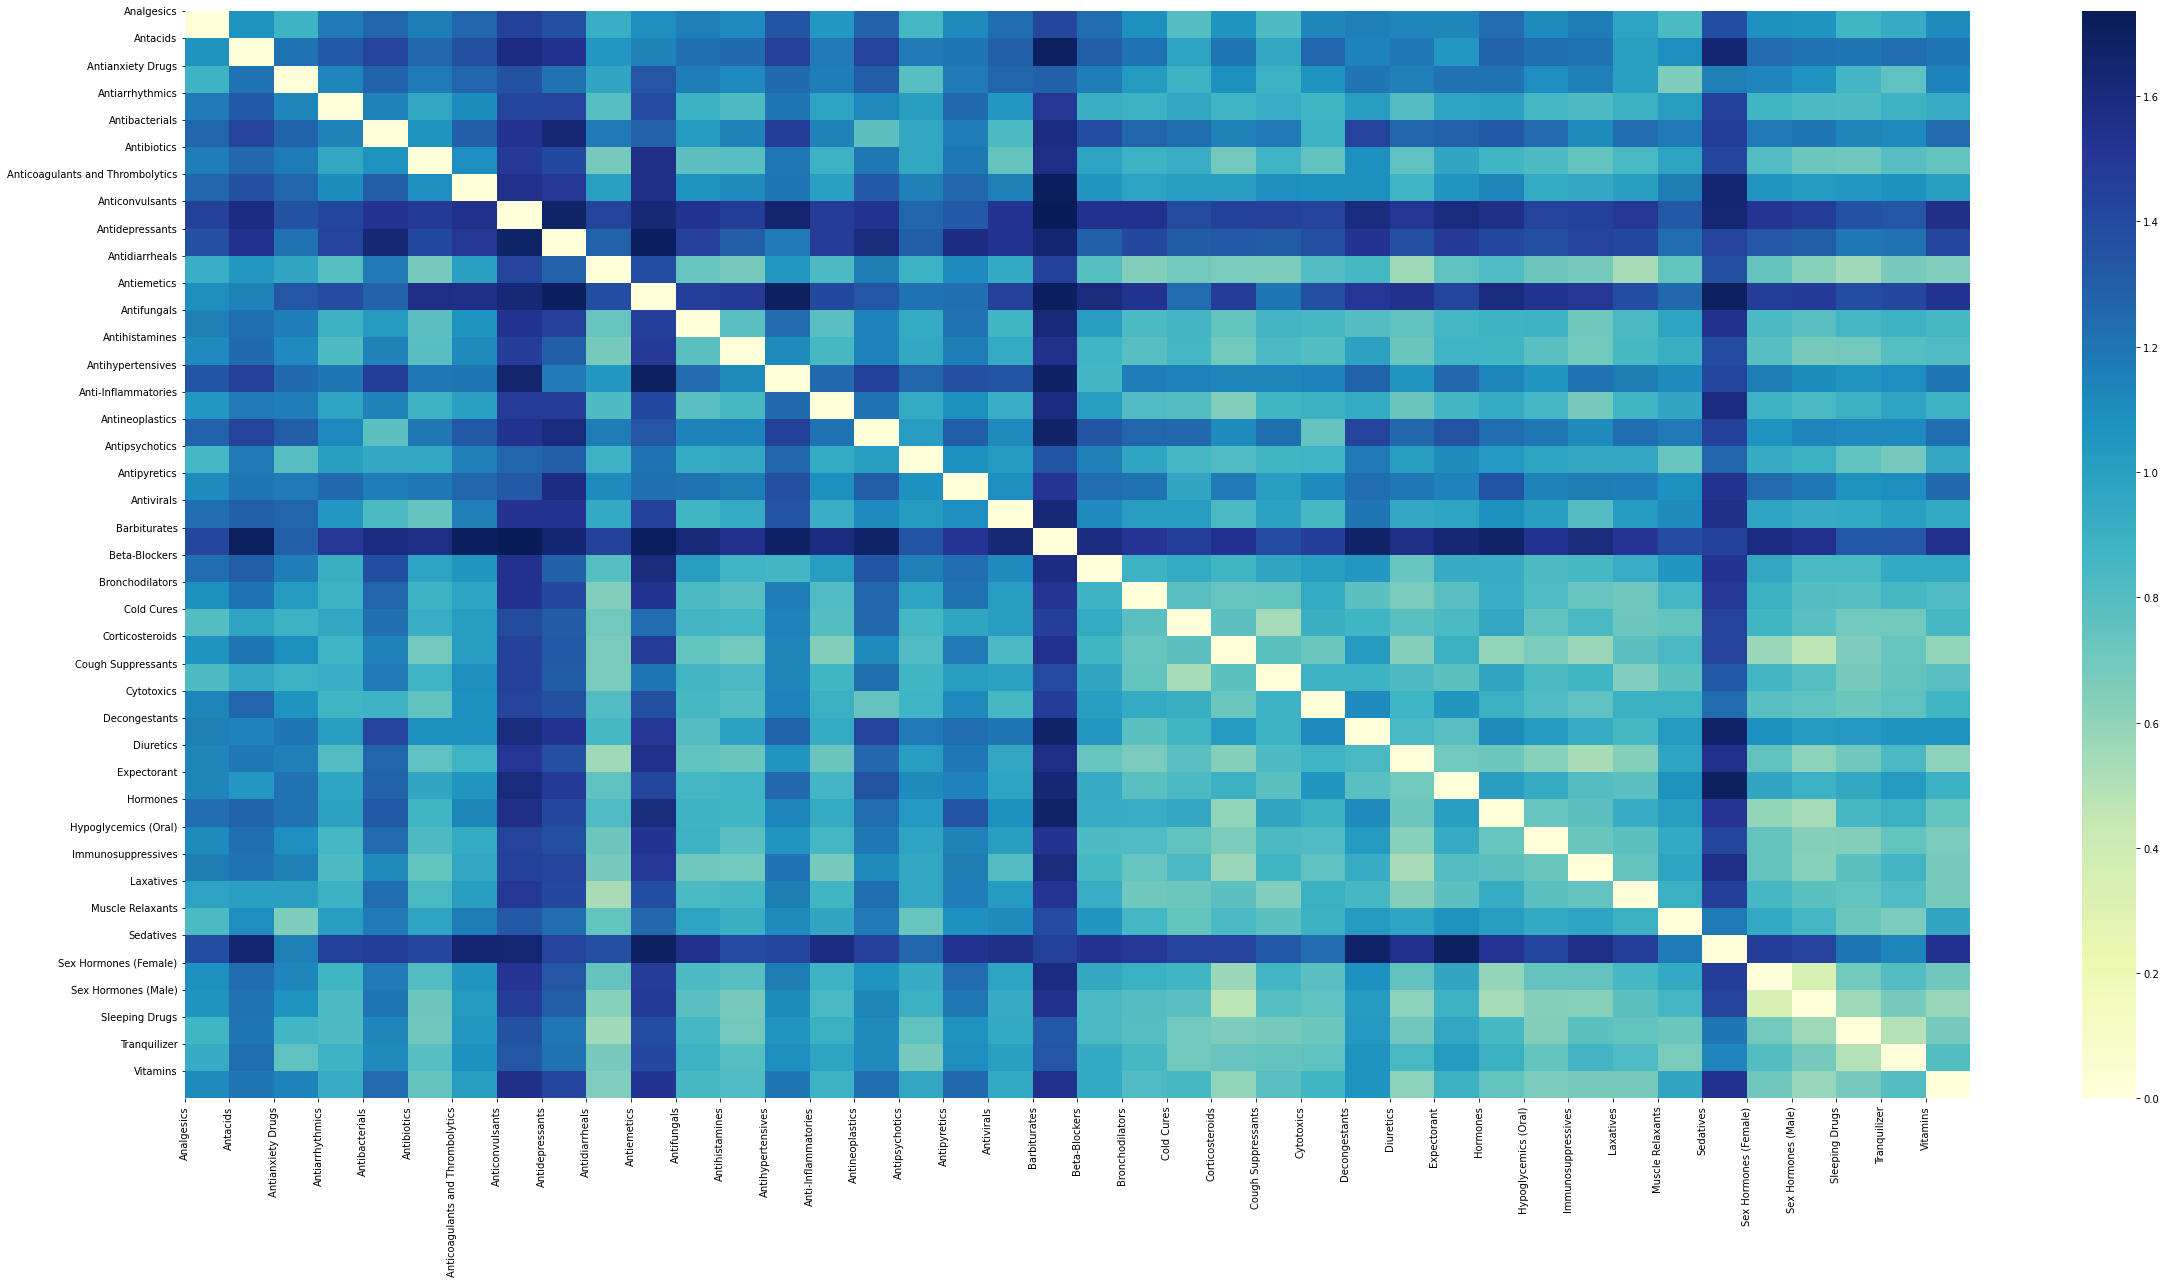

In [107]:
import seaborn as sns

sns.heatmap(euclidean_dist_matrix, cmap="YlGnBu")
plt.xticks(range(40), drug_categories['Drug'], rotation=90)
plt.yticks(range(40), drug_categories['Drug'], rotation=0)
plt.show()

The more common drug category ailments, eg Cold Cures, are much closer to most other categories compared to ailments which are less common, eg Barbiturates. This also helps explain why these common ailments have more medicines classified within them. Since they are similar to all embeddings, medicines belonging to other categories may be classified as common ailment categories

<Axes: >

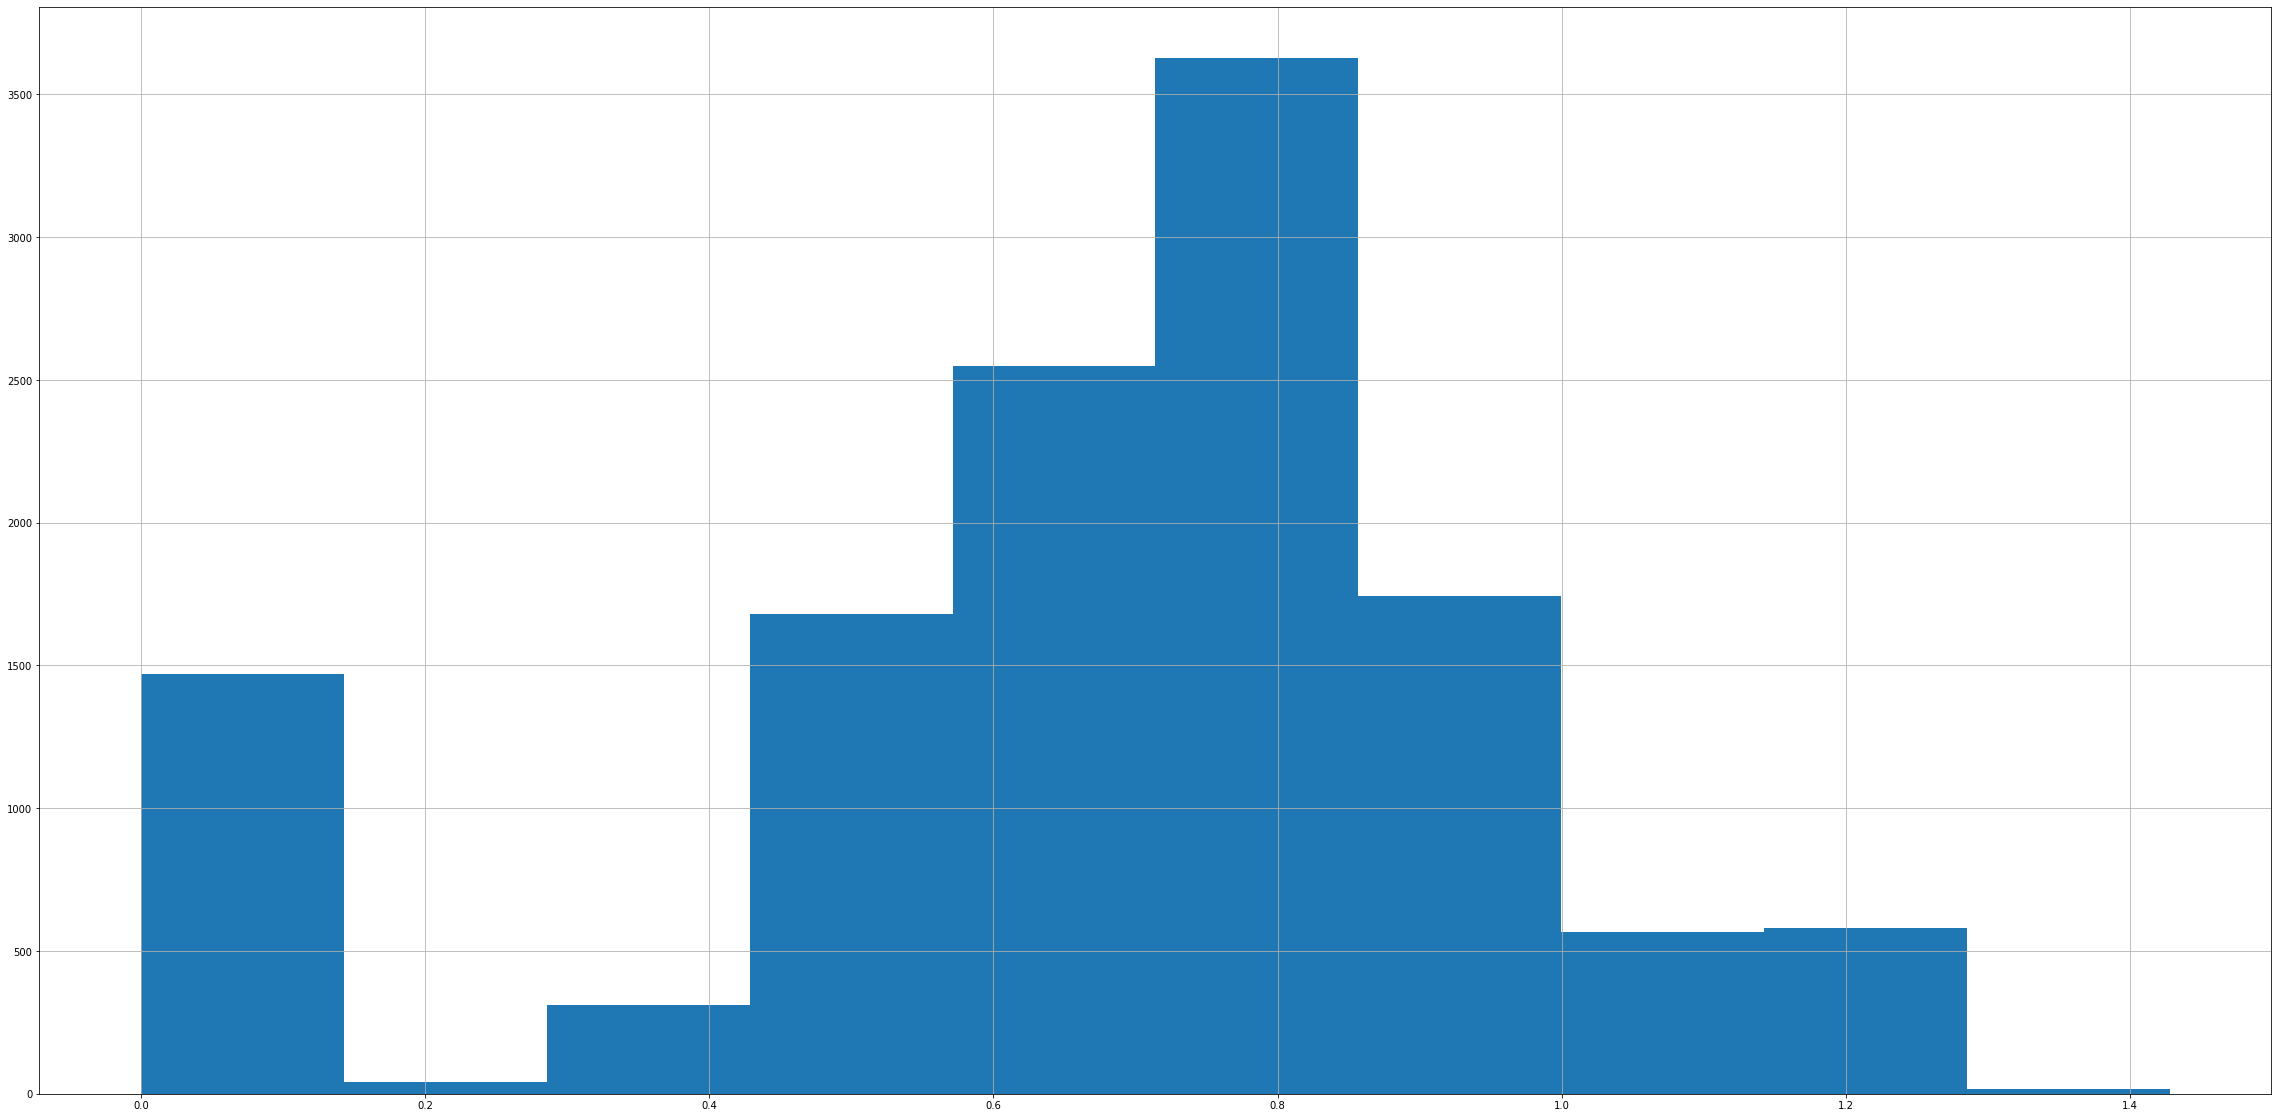

In [108]:
from scipy.spatial.distance import euclidean

# assuming you have a dataframe called `medicines` with columns 'Category1', 'Category2', and 'Category3',
# and a list of embeddings called `Drug_Category_Embeddings`

def calculate_avg_euclidean_distance(row):
    # get the embeddings for each category
    category1_embedding = Drug_Category_Embeddings[row['DescriptionDistanceBasedCategories']]
    category2_embedding = Drug_Category_Embeddings[row['topicmodellingsimilar']]
    category3_embedding = Drug_Category_Embeddings[row['clusteringsimilar']]
    
    # calculate the euclidean distances
    distance1_2 = euclidean(category1_embedding, category2_embedding)
    distance1_3 = euclidean(category1_embedding, category3_embedding)
    distance2_3 = euclidean(category2_embedding, category3_embedding)
    
    # calculate the average distance and return it
    return (distance1_2 + distance1_3 + distance2_3) / 3

# create a new column called 'avgdistancemebeddings' and fill it with the average distances
medicines_results['avgdistancemebeddings'] = medicines_results.apply(calculate_avg_euclidean_distance, axis=1)
medicines_results['avgdistancemebeddings'].hist()

From the histogram above we notice that the average euclidean distance between the embeddings of the 3 categories for each medicine (one for each method) is normally distributed around 0.8 with a spike at 0-0.1, implying extremely similar categories from each method. 

Analysing distribution of medicines by Categories for each of the three methods.

In [109]:
categories = medicines_results['DrugCategoryFromDescription'].unique()
max_length = max(medicines_results['DrugCategoryFromDescription'].value_counts())

medicine_lists = []
for category in categories:
    medicines_in_category = medicines_results.loc[medicines_results['DrugCategoryFromDescription'] == category]['Name'].tolist()
    medicine_list = medicines_in_category + [np.nan]*(max_length-len(medicines_in_category))
    medicine_lists.append(medicine_list)

category_DescriptionDistance = pd.DataFrame(medicine_lists).T
category_DescriptionDistance.fillna('', inplace=True)
category_DescriptionDistance.columns = categories

In [110]:
categories2 = medicines_results['DrugCategoryFromTopicModeling'].unique()
max_length2 = max(medicines_results['DrugCategoryFromTopicModeling'].value_counts())

medicine_lists = []
for category in categories2:
    medicines_in_category = medicines_results.loc[medicines_results['DrugCategoryFromTopicModeling'] == category]['Name'].tolist()
    medicine_list = medicines_in_category + [np.nan]*(max_length2-len(medicines_in_category))
    medicine_lists.append(medicine_list)

category_TopicModeling = pd.DataFrame(medicine_lists).T
category_TopicModeling.fillna('', inplace=True)
category_TopicModeling.columns = categories2

In [111]:
categories3 = medicines_results['DrugCategoryFromClustering'].unique()
max_length3 = max(medicines_results['DrugCategoryFromClustering'].value_counts())

medicine_lists = []
for category in categories3:
    medicines_in_category = medicines_results.loc[medicines_results['DrugCategoryFromClustering'] == category]['Name'].tolist()
    medicine_list = medicines_in_category + [np.nan]*(max_length3-len(medicines_in_category))
    medicine_lists.append(medicine_list)

category_Clustering = pd.DataFrame(medicine_lists).T
category_Clustering.fillna('', inplace=True)
category_Clustering.columns = categories3

In [112]:
pd.set_option('display.max_columns', None)
category_Clustering.head(50)

Antibiotics  \
0                Augmentin 625 Duo Tablet   
1                    Amoxyclav 625 Tablet   
2           Augmentin Duo Oral Suspension   
3                Augmentin DDS Suspension   
4               Augmentin 1000 Duo Tablet   
5   Advent Forte 457mg Syrup Tangy Orange   
6                    Augmentin 375 Tablet   
7               Augmentin 1.2gm Injection   
8                     Almox-CV 625 Tablet   
9            Augmentin ES Oral Suspension   
10                      Advent 625 Tablet   
11                     Acuclav 625 Tablet   
12                  Augpen -DS Suspension   
13                   Amoxyclav 375 Tablet   
14                  Augpen 625 BID Tablet   
15                   Augpen LB 625 Tablet   
16  Advent 228.5mg Dry Syrup Tangy Orange   
17                     Amoxyclav DS Syrup   
18                   Bactoclav 625 Tablet   
19             Bactoclav DS 457 Dry Syrup   
20                    Bactoclav Dry Syrup   
21       Brutacross CV 200mg/125mg Tablet   
22                  Boostim LB 625 Tablet   
23                Bactogard-CV 200 Tablet   
24                      Clavam 625 Tablet   
25                  Cepodem XP 325 Tablet   
26                 Cefakind-CV 500 Tablet   
27             Clamp-Kid Forte Suspension   
28                 Clavam Forte Dry Syrup   
29                   Clavam BID Dry Syrup   
30                       Clavam Dry Syrup   
31                      Clavam 375 Tablet   
32                    Cetil-CV 500 Tablet   
33                 Cefoprox CV 325 Tablet   
34             Clavam ES Dry Syrup Orange   
35                 Cefakind-CV 250 Tablet   
36         Ceftas CV 200 mg/125 mg Tablet   
37                       Clavam-XR Tablet   
38                 Clamp-Kid Forte Tablet   
39                     Curam 625mg Tablet   
40                       Clamp Suspension   
41                       Clamp 625 Tablet   
42                  Covatil CV 500 Tablet   
43      Clavam Paediatric Oral Suspension   
44          Cepodem XP 100 Dry Suspention   
45                  Cefolac CV 200 Tablet   
46                       Clavam 1g Tablet   
47                   Doxcef CV 200 Tablet   
48                        Duet 625 Tablet   
49                      Duobes 625 Tablet   

                          Cough Suppressants  \
0                           Ascoril LS Syrup   
1                             Avil 25 Tablet   
2            Ascoril D Plus Syrup Sugar Free   
3                                 Alex Syrup   
4                         Atarax 25mg Tablet   
5                           Ambrodil-S Syrup   
6                          Ativan 2mg Tablet   
7                        AB Phylline Capsule   
8                          Alex Junior Syrup   
9                         Atarax 10mg Tablet   
10          Alex Cough Lozenges Lemon Ginger   
11                         Ativan 1mg Tablet   
12                              Atarax Syrup   
13                            Ambrodil Syrup   
14                           AB-Flo-N Tablet   
15                   Ascoril LS Junior Syrup   
16              Ascoril D Junior Cough Syrup   
17                          Ascoril LS Drops   
18                      AB Phylline N Tablet   
19          Asthakind Expectorant Sugar Free   
20  Asthakind-LS Expectorant Cola Sugar Free   
21                         Ambrodil-LX Syrup   
22                 AB Phylline SR 200 Tablet   
23                            AB-Flo Capsule   
24                              Atarax Drops   
25                            Avil Injection   
26                        Allercet-DC Tablet   
27                    Ambrodil-Plus RF Syrup   
28                           Alerid-D Tablet   
29                   Ambrolite-S Expectorant   
30                  Alex-L Cough Syrup Mango   
31                  Ascoril Plus Expectorant   
32                            Alkof DX Syrup   
33                          Ascoril C  Syrup   
34                         Ambrolite D Syrup   
35    

In [113]:
merged_df = pd.concat([category_DescriptionDistance, category_TopicModeling, category_Clustering], axis=0)
#avg_medicines_per_category = merged_df.groupby(merged_df.columns, axis=0).count().mean()
merged_df

Antidiarrheals               Cough Suppressants  \
0          Augmentin 625 Duo Tablet                 Ascoril LS Syrup   
1               Azithral 500 Tablet             Allegra 120mg Tablet   
2              Amoxyclav 625 Tablet                   Avil 25 Tablet   
3     Augmentin Duo Oral Suspension  Ascoril D Plus Syrup Sugar Free   
4          Albendazole 400mg Tablet                 Allegra-M Tablet   
...                             ...                              ...   
3332                            NaN                                    
3333                            NaN                                    
3334                            NaN                                    
3335                            NaN                                    
3336                            NaN                                    

                     Immunosuppressives             Laxatives  \
0                       Azee 500 Tablet     Aciloc 150 Tablet   
1                     Azicip 500 Tablet   Aciloc RD 20 Tablet   
2                       Azax 500 Tablet  Alfoo 10mg Tablet PR   
3                             Akt 4 Kit         Acogut Tablet   
4     Amikacin Sulphate 500mg Injection     Aciloc 300 Tablet   
...                                 ...                   ...   
3332                                NaN                   NaN   
3333                                NaN                   NaN   
3334                                NaN                   NaN   
3335                                NaN                   NaN   
3336                                NaN                   NaN   

               Cold Cures              Diuretics         Tranquilizer  \
0      Atarax 25mg Tablet         Arkamin Tablet   Alprax 0.25 Tablet   
1           Anovate Cream     Amlokind-AT Tablet  Amitone 10mg Tablet   
2       Ativan 2mg Tablet    Azithral 200 Liquid     Anxit 0.5 Tablet   
3     Altraday Capsule SR   Azee 200mg Dry Syrup   Avanair 100 Tablet   
4      Atarax 10mg Tablet  Alkasol Oral Solution     Arip MT 5 Tablet   
...                   ...                    ...                  ...   
3332                  NaN                    NaN                  NaN   
3333                  NaN                    NaN                  NaN   
3334                  NaN                    NaN                  NaN   
3335                  NaN                    NaN                  NaN   
3336                  NaN                    NaN                  NaN   

                    Vitamins                        Antifungals  \
0           Aldactone Tablet          Amoxycillin 500mg Capsule   
1     Arachitol 6L Injection                 Amox 500mg Capsule   
2        Azmarda 50mg Tablet                  Almox 250 Capsule   
3        Aquashine 24 Tablet         Amoxycillin  250mg Capsule   
4          Aquasol A Capsule  Amoxycillin 125mg Oral Suspension   
...                      ...                                ...   
3332                     NaN                                      
3333                     NaN                                      
3334                     NaN                                      
3335                     NaN                                      
3336                     NaN                                      

                    Sleeping Drugs     Hypoglycemics (Oral)  \
0                 Amixide-H Tablet            Atorva Tablet   
1              Addnok 0.2mg Tablet         Atorva 40 Tablet   
2                Arip MT 10 Tablet          Aztor 10 Tablet   
3     Aculip H 12.5 mg/5 mg Tablet        Amaryl 1mg Tablet   
4              Amitone Plus Tablet  Amaryl M  2mg Tablet PR   
...                            ...                      ...   
3332                           NaN                            
3333                           NaN                            
3334                           NaN                            
3335                           NaN                            


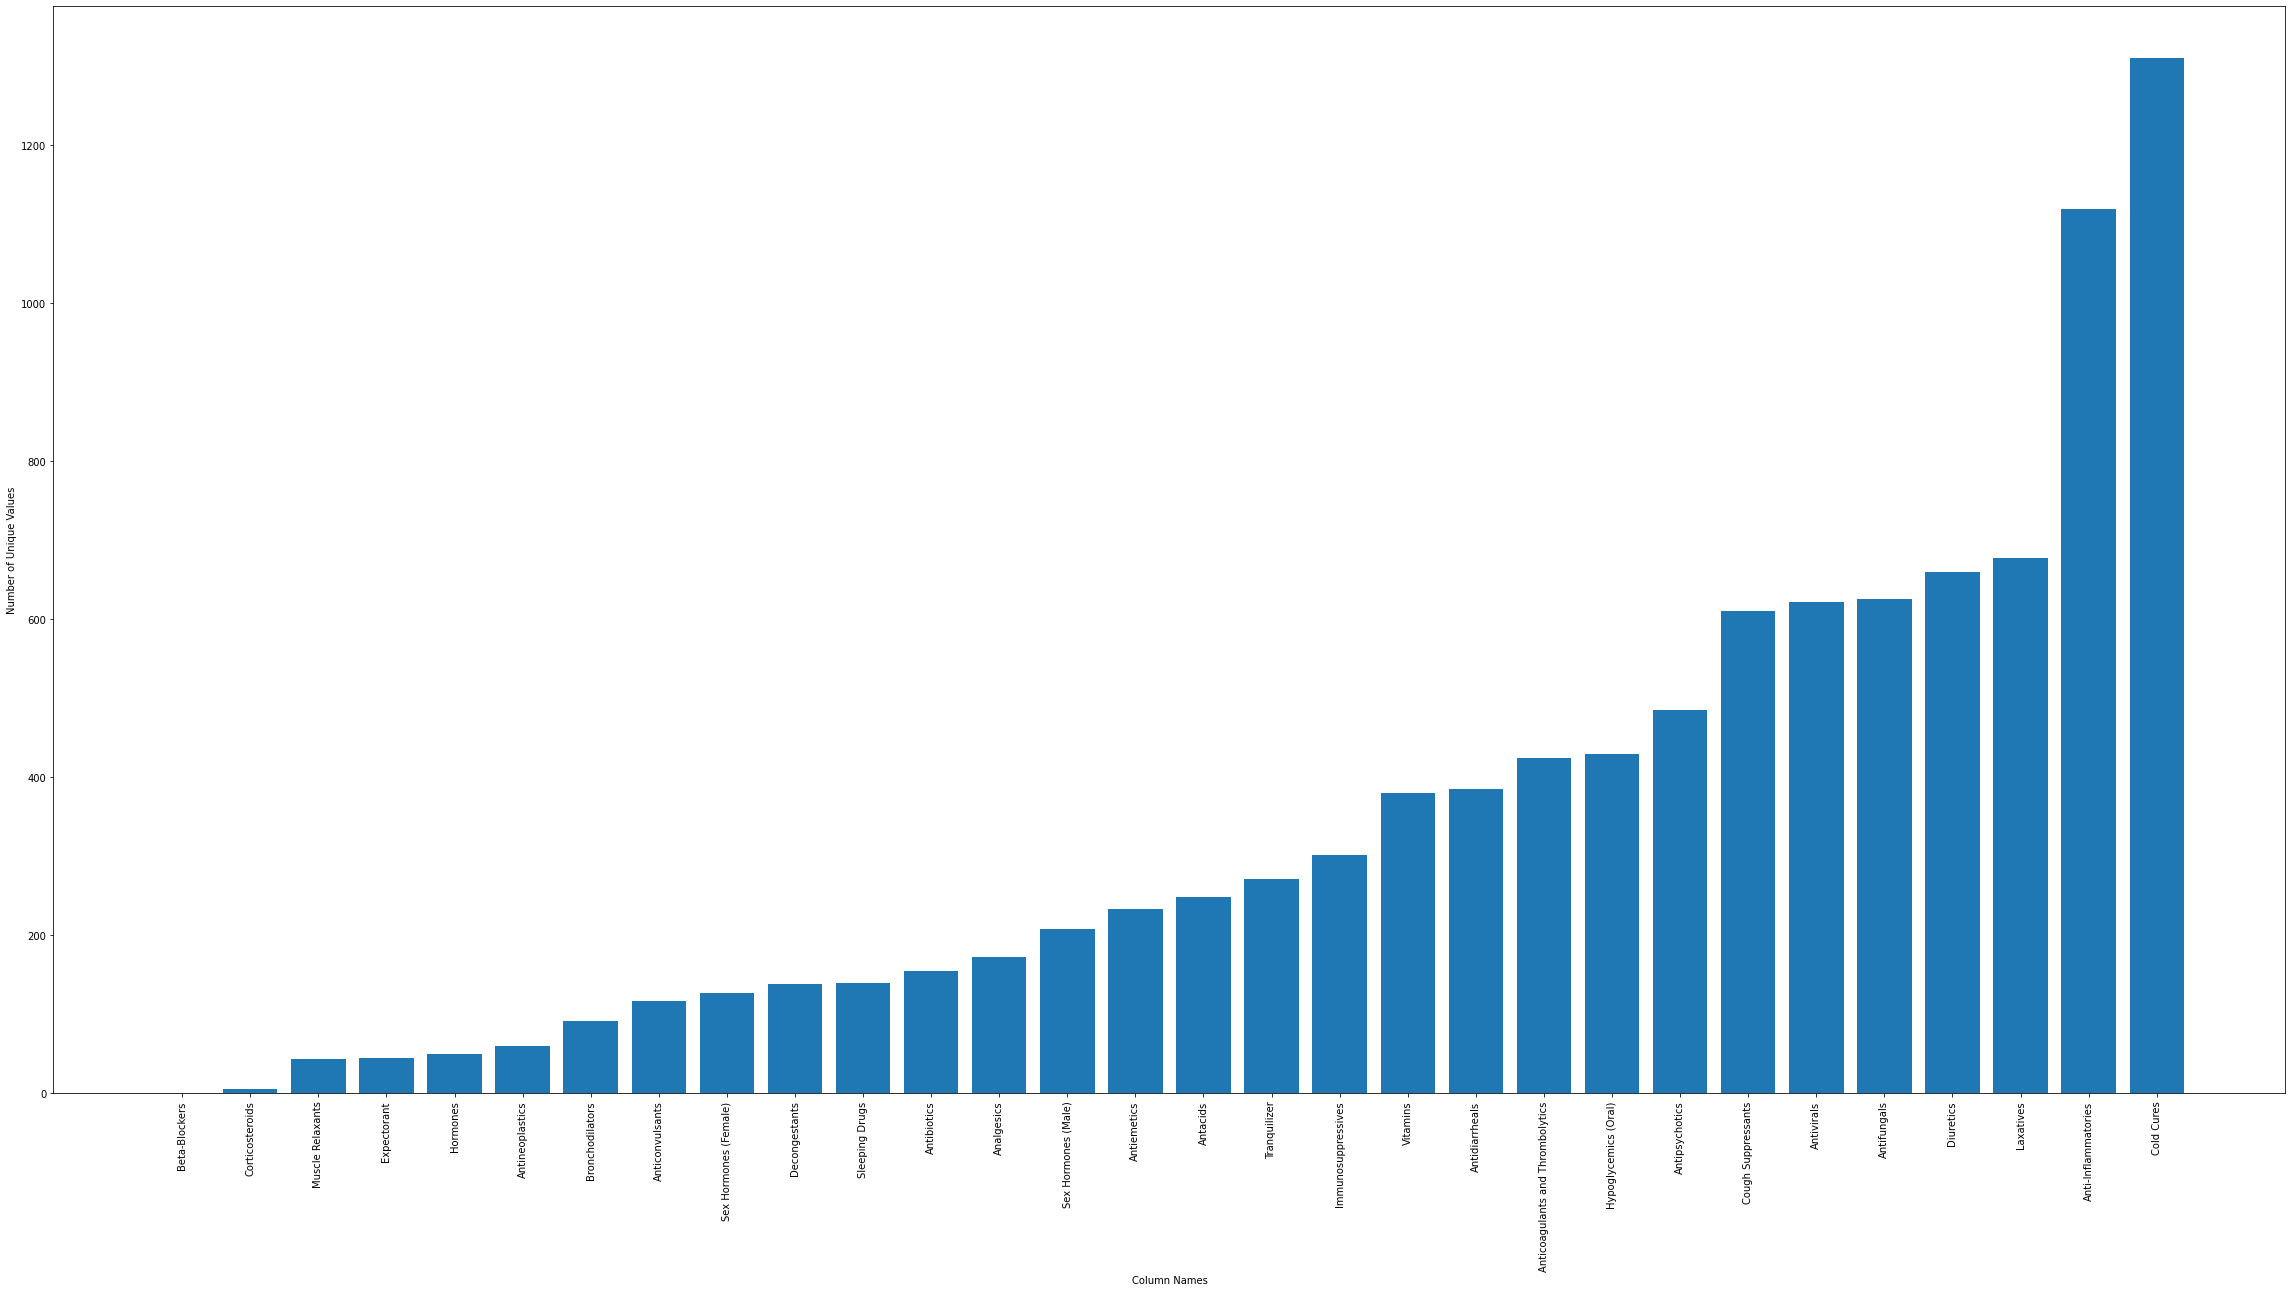

In [114]:
plt.bar(merged_df.nunique().sort_values().index, (merged_df.nunique().sort_values().values)/3)
#plt.bar(merged_df.nunique().index, (merged_df.nunique().values)/3)
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Number of Unique Values')
plt.show()

The graph above provides an approximation of medicines distribution by category.

In [115]:
print(len(medicines_results['DrugCategoryFromClustering'].value_counts()))
print(len(medicines_results['DrugCategoryFromDescription'].value_counts()))
print(len(medicines_results['DrugCategoryFromTopicModeling'].value_counts()))

16
22
20


In [116]:
print(len(medicines_results['DrugCategoryFromDescription'].unique()))
print(len(medicines_results['DrugCategoryFromTopicModeling'].unique()))
print(len(medicines_results['DrugCategoryFromTopicModeling'].unique()))

22
20
20


Not all Drug Categories were present in the final classification results from any of the three methods

**AIM 2: Price Modeling**

In [117]:
from sklearn.linear_model import LinearRegression
medicines_final_copy = medicines_final.copy()

In [118]:
#For each word, the function checks if it is present in the pre-trained KeyedVectors model. If the word is present, the function retrieves its corresponding word embedding and appends it to the list.
def bio_embedding(text):
  embed = []
  for word in text.split():
    if word in model:
      embed.append(model[word])
  if len(embed) == 0:
        return np.zeros(model.vector_size)
  else:
        return np.mean(embed, axis=0)

In [119]:
medicines_final_copy.head()

dosageForm                     activeIngredient  \
0     Tablet        Amoxycillin , Clavulanic Acid   
1      Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2     Tablet                         Azithromycin   
3     Tablet                         Fexofenadine   
4     Tablet        Amoxycillin , Clavulanic Acid   

                                   mechanismOfAction  \
0  'Augmentin 625 Duo Tablet is a combination of ...   
1  'Ascoril LS Syrup is a combination of three me...   
2  'Azithral 500 Tablet is an antibiotic.  It wor...   
3  'Allegra 120mg Tablet belongs to a class of me...   
4  'Amoxyclav 625 Tablet is a combination of two ...   

                       Name   Price                               Uses  \
0  Augmentin 625 Duo Tablet  182.78  Treatment of Bacterial infections   
1          Ascoril LS Syrup  118.00      Treatment of Cough with mucus   
2       Azithral 500 Tablet  117.71  Treatment of Bacterial infections   
3      Allegra 120mg Tablet  218.81   Treatment of Allergic conditions   
4      Amoxyclav 625 Tablet  182.78  Treatment of Bacterial infections   

  therapeutic_class                                      Combined_desc  \
0   ANTI INFECTIVES  Augmentin 625 Duo Tablet is best taken with a ...   
1       RESPIRATORY  Ascoril LS Syrup is taken with or without food...   
2   ANTI INFECTIVES  Azithral 500 Tablet is taken orally, preferabl...   
3       RESPIRATORY  Allegra 120mg Tablet is an anti-allergy medici...   
4   ANTI INFECTIVES  Amoxyclav 625 Tablet is best taken with a meal...   

                                              tokens  
0  [augmentin, duo, best, taken, meal, reduce, ch...  
1  [ascoril, ls, syrup, taken, without, food, dos...  
2  [azithral, taken, orally, preferably, one, hou...  
3  [allegra, mg, anti, allergy, allergic, runny, ...  
4  [amoxyclav, best, taken, meal, reduce, chance,...

In [120]:
medicines_final_copy.isna().sum()

dosageForm              0
activeIngredient        0
mechanismOfAction       0
Name                    0
Price                 461
Uses                 1612
therapeutic_class       0
Combined_desc           0
tokens                  0
dtype: int64

In [121]:
medicines_final_copy['therapeutic_class'] = medicines_final_copy['therapeutic_class'].fillna('unknown')
medicines_final_copy['Combined_desc'] = medicines_final_copy['Combined_desc'].fillna('unknown')
# There were NA values, which were throwing errors(considering it as float) while creating the embeddings so filled the na values
medicines_final_copy['Price'] = medicines_final_copy['Price'].fillna(medicines_final_copy['Price'].mean())

In [122]:
medicines_final_copy['Combined_desc_embed'] = medicines_final_copy['Combined_desc'].apply(bio_embedding)
medicines_final_copy['activeIngredient_embed'] = medicines_final_copy['activeIngredient'].apply(bio_embedding)
medicines_final_copy['therapeutic_class_embed'] = medicines_final_copy['therapeutic_class'].apply(bio_embedding)

In [123]:
# Combine the embeddings into a single feature matrix
X_embed = np.hstack((np.vstack(medicines_final_copy['Combined_desc_embed'].values),
                     np.vstack(medicines_final_copy['activeIngredient_embed'].values),
                     np.vstack(medicines_final_copy['therapeutic_class_embed'].values)))

In [124]:
X_embed.shape

(12583, 600)

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_embed)

In [126]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_std)
y = medicines_final_copy['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Linear Regression

In [127]:
# Creating an instance of LR
LRmodel = LinearRegression() 

# Fitting the LR model
LRmodel.fit(X_train, y_train)

# Prediction on test set
y_pred = LRmodel.predict(X_test)

# Calculating the score
score = LRmodel.score(X_test, y_test)

#Printing the R2
print(f'R^2 score: {score:.2f}')

R^2 score: 0.04


Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Creating an instance for RF
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model 
rf_model.fit(X_train, y_train)

# Prediction on test set
y_pred = rf_model.predict(X_test)

#Calculating OOS R2
score = rf_model.score(X_test, y_test)
print(f'R^2 score: {score:.2f}')

R^2 score: 0.05


Neural Network

In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Creating an instance for Multi Layer Perceptron, with 300 neurons in the hidden layer, relu as the activation function and alpha = 0.001
mlp = MLPRegressor(hidden_layer_sizes=(300,), activation='relu', alpha=0.001)

# Fitting MLP
mlp.fit(X_train, y_train)

# Prediction on test set
y_pred = mlp.predict(X_test)

#Calculating OOS R2
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2:.2f}')

R-squared: 0.10


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**AIM 3: Substitution**

In [130]:
#Aim 3: Predict the substitute of a medicine basis product information, description and benifits

In [131]:
##creating an index column (first resetting it)
medicines_final_copy = medicines_final_copy.reset_index(drop=True)

In [132]:
## calculating the similarity between medicine
med_similarity_matrix = cosine_similarity(combineddesc_medicines, combineddesc_medicines)

In [133]:
## getting index of 6 most similar medicines (as the first is likely to be itself)
sim_index = np.argsort(med_similarity_matrix,axis=1)[:,-1:-7:-1]

In [134]:
#storing the indices in a dataframe
df_sim_index = pd.DataFrame(sim_index, columns = ['Sim0','Sim1','Sim2','Sim3','Sim4','Sim5'])

In [135]:
## adding columns with substitute index
medicines_final_copy['Sim0']=df_sim_index['Sim0']
medicines_final_copy['Sim1']=df_sim_index['Sim1']
medicines_final_copy['Sim2']=df_sim_index['Sim2']
medicines_final_copy['Sim3']=df_sim_index['Sim3']
medicines_final_copy['Sim4']=df_sim_index['Sim4']
medicines_final_copy['Sim5']=df_sim_index['Sim5']

In [141]:
medicines_final_copy['index'] = range(0,len(medicines_final_copy.index))

In [142]:
medicines_final_copy

dosageForm                     activeIngredient  \
0          Tablet        Amoxycillin , Clavulanic Acid   
1           Syrup  Ambroxol,Levosalbutamol,Guaifenesin   
2          Tablet                         Azithromycin   
3          Tablet                         Fexofenadine   
4          Tablet        Amoxycillin , Clavulanic Acid   
...           ...                                  ...   
12578  Capsule SR         Aceclofenac,Thiocolchicoside   
12579      Tablet                           Sildenafil   
12580   Tablet ER              Dapagliflozin,Metformin   
12581      Tablet                       Clarithromycin   
12582   Tablet DT                           Diclofenac   

                                       mechanismOfAction  \
0      'Augmentin 625 Duo Tablet is a combination of ...   
1      'Ascoril LS Syrup is a combination of three me...   
2      'Azithral 500 Tablet is an antibiotic.  It wor...   
3      'Allegra 120mg Tablet belongs to a class of me...   
4      'Amoxyclav 625 Tablet is a combination of two ...   
...                                                  ...   
12578  'Zerodol TH OD 200 mg/8 mg Capsule SR is a com...   
12579  'Zenegra Red 100mg Tablet is a phosphodiestera...   
12580  "Zucapride-M 1000 Tablet ER is a combination o...   
12581  'Zoclar 250 Tablet is an antibiotic.  It works...   
12582  'Zobid D 50 Tablet DT is a non-steroidal anti-...   

                                       Name   Price  \
0                  Augmentin 625 Duo Tablet  182.78   
1                          Ascoril LS Syrup  118.00   
2                       Azithral 500 Tablet  117.71   
3                      Allegra 120mg Tablet  218.81   
4                      Amoxyclav 625 Tablet  182.78   
...                                     ...     ...   
12578  Zerodol TH OD 200 mg/8 mg Capsule SR  209.15   
12579              Zenegra Red 100mg Tablet  192.00   
12580            Zucapride-M 1000 Tablet ER  162.00   
12581                     Zoclar 250 Tablet   95.46   
12582                  Zobid D 50 Tablet DT   21.23   

                                        Uses            therapeutic_class  \
0          Treatment of Bacterial infections              ANTI INFECTIVES   
1              Treatment of Cough with mucus                  RESPIRATORY   
2          Treatment of Bacterial infections              ANTI INFECTIVES   
3           Treatment of Allergic conditions                  RESPIRATORY   
4          Treatment of Bacterial infections              ANTI INFECTIVES   
...                                      ...                          ...   
12578                                    NaN              PAIN ANALGESICS   
12579      Treatment of Erectile dysfunction  SEX STIMULANTS REJUVENATORS   
12580  Treatment of Type 2 diabetes mellitus                ANTI DIABETIC   
12581      Treatment of Bacterial infections              ANTI INFECTIVES   
12582                            Pain relief              PAIN ANALGESICS   

                                           Combined_desc  \
0      Augmentin 625 Duo Tablet is best taken with a ...   
1      Ascoril LS Syrup is taken with or without food...   
2      Azithral 500 Tablet is taken orally, preferabl...   
3      Allegra 120mg Tablet is an anti-allergy medici...   
4      Amoxyclav 625 Tablet is best taken with a meal...   
...                                                  ...   
12578  Zerodol TH OD 200 mg/8 mg Capsule SR should be...   
12579  Zenegra Red 100mg Tablet is a prescription med...   
12580  Most side effects do not require any medical a...   
12581  Zoclar 250 Tablet is also effective against so...   
12582  Most side effects do not require any medical a...   

                                                  tokens  \
0      [augmentin, duo, best, taken, meal, reduce, ch...   
1      [ascoril, ls, syrup, taken, without, food, dos...   
2      [azithral, taken, orally, preferably, one, hou...   
3      [allegra, mg, anti, allergy, allerg

In [143]:
## getting the index of first substitute
medicines_final_copy['Sub1']=np.where(medicines_final_copy['Sim0']==medicines_final_copy['index'],medicines_final_copy['Sim1'],medicines_final_copy['Sim0'])

In [146]:
# appending details of the substitute medicine with the primary medicine
index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['Name']))
medicines_final_copy['Sub1_Name'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])
# index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['id']))
# medicines_final_copy['Sub1_id'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])
# index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['manufacturer']))
# medicines_final_copy['Sub1_manufacturer'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])
index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['Price']))
medicines_final_copy['Sub1_Price'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])
index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['therapeutic_class']))
medicines_final_copy['Sub1_therapeutic_class'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])

In [148]:
index_to_category = dict(zip(medicines_final_copy.index, medicines_final_copy['dosageForm']))
medicines_final_copy['Sub1_dosageForm'] = medicines_final_copy['Sub1'].apply(lambda x: index_to_category[x])

medicines_sub = medicines_final_copy[['dosageForm', 'Name', 'Price', 'therapeutic_class','Sub1','Sub1_Name','Sub1_Price','Sub1_therapeutic_class','Sub1_dosageForm']]
np.where(medicines_sub['therapeutic_class']==medicines_sub['Sub1_therapeutic_class'],1,0).sum()/len(medicines_sub)
np.where(medicines_sub['dosageForm']==medicines_sub['Sub1_dosageForm'],1,0).sum()/len(medicines_sub)

0.8453468966065326

In [149]:
medicines_sub.head(100)

dosageForm                      Name   Price therapeutic_class   Sub1  \
0      Tablet  Augmentin 625 Duo Tablet  182.78   ANTI INFECTIVES     96   
1       Syrup          Ascoril LS Syrup  118.00       RESPIRATORY   9039   
2      Tablet       Azithral 500 Tablet  117.71   ANTI INFECTIVES    308   
3      Tablet      Allegra 120mg Tablet  218.81       RESPIRATORY   3701   
4      Tablet      Amoxyclav 625 Tablet  182.78   ANTI INFECTIVES    257   
..        ...                       ...     ...               ...    ...   
95     Tablet       Azikem 500mg Tablet   70.62   ANTI INFECTIVES  11894   
96     Tablet      Augmentin 375 Tablet  229.00   ANTI INFECTIVES    257   
97     Tablet         Alaspan AM Tablet   98.80       RESPIRATORY   5348   
98      Syrup              Alerid Syrup   19.82       RESPIRATORY   3739   
99  Tablet IR        Acton-OR Tablet SR   50.55   PAIN ANALGESICS   3996   

                Sub1_Name  Sub1_Price Sub1_therapeutic_class Sub1_dosageForm  
0    Augmentin 375 Tablet      229.00        ANTI INFECTIVES          Tablet  
1       Soventus-LS Syrup      119.55            RESPIRATORY           Syrup  
2      Azivent 500 Tablet       96.12        ANTI INFECTIVES          Tablet  
3     Hhfexo 120mg Tablet      108.00            RESPIRATORY          Tablet  
4    Amoxyclav 375 Tablet      356.92        ANTI INFECTIVES          Tablet  
..                    ...         ...                    ...             ...  
95     Yanic 500mg Tablet       61.50        ANTI INFECTIVES          Tablet  
96   Amoxyclav 375 Tablet      356.92        ANTI INFECTIVES          Tablet  
97      Lorfast-AM Tablet       97.00            RESPIRATORY          Tablet  
98            Hicet Syrup       39.64            RESPIRATORY           Syrup  
99  Instaflex P Tablet SR       60.00        PAIN ANALGESICS       Tablet IR  

[100 rows x 9 columns]

In [150]:
#We observe that the for a given medicine, we are able to predict a substitute with the same therapeutic_class, having the same benifits.